# Sentiment Analyser

## Section 1: Load modules

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump
import os
from joblib import load

Define sentiment measure (move cell to select).

In [2]:
# Ratio filtered sentiment
sent_choice_pos="Sent_ratio_filt_"
sent_choice_neg=("x")

In [3]:
# positive confidence in sentiment 
sent_choice_pos="Sent_conf_pos_"
sent_choice_neg=("Y")

In [4]:
# Average Sentiment Filtered
sent_choice_pos="Sent_avg_filt_"
sent_choice_neg=("Y")

In [5]:
# Positive Sentiment Filtered
sent_choice_pos="Sent_pos_filt_"
sent_choice_neg=("Y")

In [6]:
# average confidence in sentiment 
sent_choice_pos="Sent_avg_conf_neg_"
sent_choice_neg=("Y")

In [7]:
# negative confidence in sentiment 
sent_choice_pos="Sent_conf_pos_"
sent_choice_neg=("Y")

In [8]:
# Ratio sentiment
sent_choice_pos="Sent_ratio_"
sent_choice_neg=("Sent_ratio_filt")

In [9]:
# negative confidence in sentiment 
sent_choice_pos="Sent_conf_neg_"
sent_choice_neg=("Y")

In [10]:
# Define which sentiment score should be loaded

# Negative Sentiment
sent_choice_pos="Sent_neg_"
sent_choice_neg=("Sent_neg_filt")

In [11]:
# Negative Sentiment Filtered
sent_choice_pos="Sent_neg_filt_"
sent_choice_neg=("Y")

In [12]:
# Average Sentiment 
sent_choice_pos="Sent_avg_"
sent_choice_neg=("Sent_avg_filt_")

In [13]:
# average confidence in sentiment 
sent_choice_pos="News_vol_"
sent_choice_neg=("y")

In [14]:
# average confidence in sentiment 
sent_choice_pos="Sent_avg_conf_"
sent_choice_neg=("Sent_avg_conf_n")

In [15]:
# Ratio sentiment confidence
sent_choice_pos="Sent_ratio_conf_"
sent_choice_neg=("Sent_ratio_filt")

In [16]:
# absolute difference in sentiment confidence
sent_choice_pos="Sent_conf_abs_"
sent_choice_neg=("Y")

## Section 1: Transform prices to returns

### Section 1.1: Load data, exploratory data analysis

In [17]:
df_prices = pd.read_excel("../01_Data/01_Eikon/2_Prices/2_Full Stock Prices data/2_WRDS_SP 500 Full stock price.xlsx", index_col="Date")
df_prices.head()

,.SPX,A,AAL.O,AAP,AAPL.O,ABBV.K,ABC,ABMD.O,ABT,ACN,...,XLNX.O,XOM,XRAY.O,XRX,XYL,YUM,ZBH,ZBRA.O,ZION.O,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-01,2803.69,81.24,34.64,160.62,174.97,80.10,82.98,348.06,78.59,164.20,...,126.64,80.00,49.13,31.29,76.37,95.37,125.41,NaN,51.17,95.75
2019-03-04,2792.81,80.13,33.72,158.40,175.85,79.46,80.48,338.20,78.62,162.82,...,122.81,80.31,48.69,31.36,76.25,95.14,124.43,NaN,50.86,95.87
2019-03-05,2789.65,79.74,33.23,157.31,175.53,78.91,79.66,333.21,78.22,163.67,...,122.95,80.19,48.96,31.09,76.19,95.93,124.11,NaN,50.79,95.78
2019-03-06,2771.45,78.75,32.76,157.97,174.52,78.09,76.63,317.85,77.70,162.39,...,121.36,79.28,47.75,30.85,75.85,96.60,123.24,NaN,49.67,94.17
2019-03-07,2748.93,78.73,32.22,154.13,172.50,78.24,76.33,317.42,76.80,161.85,...,119.91,80.16,48.22,30.24,75.32,96.54,121.39,NaN,48.71,92.55


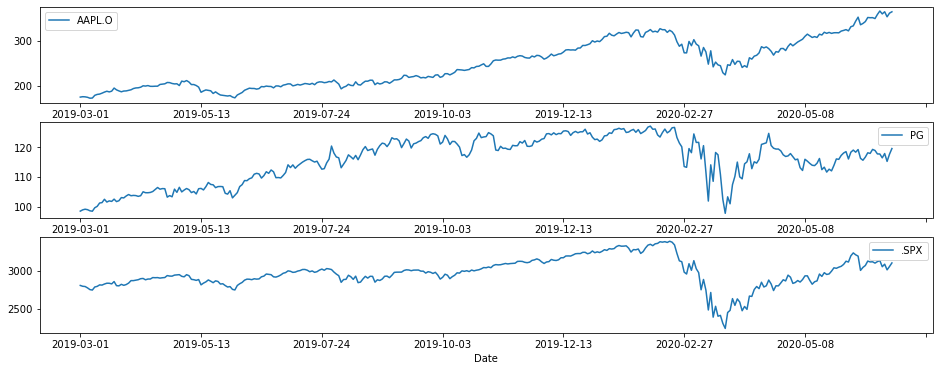

In [18]:
# plot some companies prices 
plt.subplot(311)
df_prices['AAPL.O'].plot(figsize=(16, 6), legend=True)
plt.subplot(312)
df_prices['PG'].plot(figsize=(16, 6), legend=True)
plt.subplot(313)
df_prices['.SPX'].plot(figsize=(16, 6), legend=True)

In [19]:
# calculate returns, fills Nan with prior price by default
df_returns=df_prices.pct_change().dropna(how="all")

# Store to excel 
#df_returns.to_excel("../01_Data/10_Modelling/50_Daily_firm_specific_returns.xlsx")

df_returns

,.SPX,A,AAL.O,AAP,AAPL.O,ABBV.K,ABC,ABMD.O,ABT,ACN,...,XLNX.O,XOM,XRAY.O,XRX,XYL,YUM,ZBH,ZBRA.O,ZION.O,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-04,-0.003881,-0.013663,-0.026559,-0.013821,0.005029,-0.007990,-0.030128,-0.028328,0.000382,-0.008404,...,-0.030243,0.003875,-0.008956,0.002237,-0.001571,-0.002412,-0.007814,NaN,-0.006058,0.001253
2019-03-05,-0.001131,-0.004867,-0.014531,-0.006881,-0.001820,-0.006922,-0.010189,-0.014755,-0.005088,0.005220,...,0.001140,-0.001494,0.005545,-0.008610,-0.000787,0.008304,-0.002572,NaN,-0.001376,-0.000939
2019-03-06,-0.006524,-0.012415,-0.014144,0.004196,-0.005754,-0.010392,-0.038037,-0.046097,-0.006648,-0.007821,...,-0.012932,-0.011348,-0.024714,-0.007720,-0.004463,0.006984,-0.007010,NaN,-0.022052,-0.016809
2019-03-07,-0.008126,-0.000254,-0.016484,-0.024308,-0.011575,0.001921,-0.003915,-0.001353,-0.011583,-0.003325,...,-0.011948,0.011100,0.009843,-0.019773,-0.006987,-0.000621,-0.015011,NaN,-0.019328,-0.017203
2019-03-08,-0.002132,-0.009526,-0.009621,-0.015312,0.002377,-0.008436,0.001048,-0.010113,-0.002214,-0.000989,...,-0.010675,-0.014346,0.007051,0.001984,-0.003186,0.001347,0.001812,NaN,-0.000205,-0.001513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.025855,-0.030466,-0.068571,-0.046476,-0.017652,-0.022300,-0.026207,-0.043234,-0.043812,-0.026808,...,-0.024777,-0.047109,-0.042662,-0.052664,-0.028016,-0.015469,-0.061448,-0.039383,-0.063698,-0.027587
2020-06-25,0.010959,0.008087,0.009969,-0.000629,0.013276,0.019445,0.018515,0.000372,0.026575,0.076694,...,0.004306,0.015056,-0.000933,0.011635,-0.004644,-0.006470,-0.024700,0.012535,0.031005,0.007520
2020-06-26,-0.024227,-0.015586,-0.059985,-0.020432,-0.030726,-0.008867,-0.014801,-0.010259,-0.010154,-0.022317,...,-0.024333,-0.034315,0.007006,-0.037700,0.016088,-0.014070,0.001127,-0.028466,-0.057226,-0.019585


In [20]:
# calculate the unconditional mean of SPX returns in % 
print(df_returns[df_returns.index <"2019-09-01"]['.SPX'].mean()*100)
mean_in_bps=df_returns[df_returns.index <"2019-09-01"]['.SPX'].mean()*10000
print(mean_in_bps)
print(1.8/mean_in_bps)


0.037395748054134904
3.7395748054134907
0.4813381450196639


In [21]:
# calculate the unconditional mean of SPX returns in % 
print(df_returns[(df_returns.index >"2019-12-31") & (df_returns.index <"2020-03-01")]['.SPX'].mean()*100)

-0.21621952632516261


In [22]:
# calculate the unconditional mean of SPX returns in % 
print(df_returns[(df_returns.index >"2020-02-29")]['.SPX'].mean()*100)

0.1153943006912433


In [23]:
# Create a new dataframe that contains excess returns over the S&P 500 (market returns)
df_excess_returns = pd.DataFrame()
for x in df_returns.columns:
    df_excess_returns[x] = df_returns[x] - df_returns[".SPX"]

# Drop  column including S&P returns    
df_excess_returns.drop([".SPX"], axis=1, inplace=True)

df_excess_returns

# Store to excel 
#df_excess_returns.to_excel("../01_Data/10_Modelling/50_Daily_firm_specific_excess_returns.xlsx")

,A,AAL.O,AAP,AAPL.O,ABBV.K,ABC,ABMD.O,ABT,ACN,ADBE.O,...,XLNX.O,XOM,XRAY.O,XRX,XYL,YUM,ZBH,ZBRA.O,ZION.O,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-04,-0.009783,-0.022678,-0.009941,0.008910,-0.004109,-0.026247,-0.024448,0.004262,-0.004524,-0.018278,...,-0.026363,0.007756,-0.005075,0.006118,0.002309,0.001469,-0.003934,NaN,-0.002178,0.005134
2019-03-05,-0.003736,-0.013400,-0.005750,-0.000688,-0.005790,-0.009057,-0.013623,-0.003956,0.006352,-0.001890,...,0.002271,-0.000363,0.006677,-0.007478,0.000345,0.009435,-0.001440,NaN,-0.000245,0.000193
2019-03-06,-0.005891,-0.007620,0.010720,0.000770,-0.003867,-0.031513,-0.039573,-0.000124,-0.001296,0.002717,...,-0.006408,-0.004824,-0.018190,-0.001195,0.002062,0.013508,-0.000486,NaN,-0.015527,-0.010285
2019-03-07,0.007872,-0.008358,-0.016183,-0.003449,0.010047,0.004211,0.006773,-0.003457,0.004800,0.004460,...,-0.003822,0.019226,0.017969,-0.011647,0.001138,0.007505,-0.006886,NaN,-0.011202,-0.009077
2019-03-08,-0.007394,-0.007490,-0.013180,0.004509,-0.006304,0.003180,-0.007981,-0.000082,0.001143,-0.000687,...,-0.008543,-0.012215,0.009183,0.004116,-0.001055,0.003478,0.003944,NaN,0.001926,0.000619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.004611,-0.042716,-0.020621,0.008203,0.003555,-0.000352,-0.017379,-0.017956,-0.000953,0.005721,...,0.001078,-0.021254,-0.016807,-0.026809,-0.002160,0.010387,-0.035593,-0.013528,-0.037843,-0.001732
2020-06-25,-0.002873,-0.000990,-0.011589,0.002316,0.008486,0.007555,-0.010587,0.015616,0.065735,0.001249,...,-0.006653,0.004097,-0.011893,0.000676,-0.015603,-0.017429,-0.035659,0.001575,0.020046,-0.003439
2020-06-26,0.008641,-0.035758,0.003794,-0.006499,0.015360,0.009426,0.013968,0.014073,0.001910,0.001272,...,-0.000106,-0.010088,0.031233,-0.013473,0.040314,0.010157,0.025354,-0.004239,-0.032999,0.004642


## Section 2: Data transformation 

### Section 2.1: Transform return data to panel

In [24]:
temp=df_excess_returns.reset_index()
temp

,Date,A,AAL.O,AAP,AAPL.O,ABBV.K,ABC,ABMD.O,ABT,ACN,...,XLNX.O,XOM,XRAY.O,XRX,XYL,YUM,ZBH,ZBRA.O,ZION.O,ZTS
0,2019-03-04,-0.009783,-0.022678,-0.009941,0.008910,-0.004109,-0.026247,-0.024448,0.004262,-0.004524,...,-0.026363,0.007756,-0.005075,0.006118,0.002309,0.001469,-0.003934,NaN,-0.002178,0.005134
1,2019-03-05,-0.003736,-0.013400,-0.005750,-0.000688,-0.005790,-0.009057,-0.013623,-0.003956,0.006352,...,0.002271,-0.000363,0.006677,-0.007478,0.000345,0.009435,-0.001440,NaN,-0.000245,0.000193
2,2019-03-06,-0.005891,-0.007620,0.010720,0.000770,-0.003867,-0.031513,-0.039573,-0.000124,-0.001296,...,-0.006408,-0.004824,-0.018190,-0.001195,0.002062,0.013508,-0.000486,NaN,-0.015527,-0.010285
3,2019-03-07,0.007872,-0.008358,-0.016183,-0.003449,0.010047,0.004211,0.006773,-0.003457,0.004800,...,-0.003822,0.019226,0.017969,-0.011647,0.001138,0.007505,-0.006886,NaN,-0.011202,-0.009077
4,2019-03-08,-0.007394,-0.007490,-0.013180,0.004509,-0.006304,0.003180,-0.007981,-0.000082,0.001143,...,-0.008543,-0.012215,0.009183,0.004116,-0.001055,0.003478,0.003944,NaN,0.001926,0.000619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2020-06-24,-0.004611,-0.042716,-0.020621,0.008203,0.003555,-0.000352,-0.017379,-0.017956,-0.000953,...,0.001078,-0.021254,-0.016807,-0.026809,-0.002160,0.010387,-0.035593,-0.013528,-0.037843,-0.001732
332,2020-06-25,-0.002873,-0.000990,-0.011589,0.002316,0.008486,0.007555,-0.010587,0.015616,0.065735,...,-0.006653,0.004097,-0.011893,0.000676,-0.015603,-0.017429,-0.035659,0.001575,0.020046,-0.003439
333,2020-06-26,0.008641,-0.035758,0.003794,-0.006499,0.015360,0.009426,0.013968,0.014073,0.001910,...,-0.000106,-0.010088,0.031233,-0.013473,0.040314,0.010157,0.025354,-0.004239,-0.032999,0.004642
334,2020-06-29,0.001496,0.061243,0.005030,0.008361,-0.011461,-0.016601,-0.010715,-0.011304,-0.013509,...,-0.004358,0.001362,0.003635,0.001251,0.002730,0.011143,-0.001951,0.008161,0.008851,-0.019812


In [25]:
# Transform return data to panel data
df_ex_ret_transf = df_excess_returns.reset_index().melt(id_vars='Date',var_name = 'Company', value_name = 'Excess_returns')
df_ex_ret_transf

,Date,Company,Excess_returns
0,2019-03-04,A,-0.009783
1,2019-03-05,A,-0.003736
2,2019-03-06,A,-0.005891
3,2019-03-07,A,0.007872
4,2019-03-08,A,-0.007394
...,...,...,...
180427,2020-06-24,ZTS,-0.001732
180428,2020-06-25,ZTS,-0.003439
180429,2020-06-26,ZTS,0.004642
180430,2020-06-29,ZTS,-0.019812


In [27]:
# Remove rows for companies with NaN Excess_returns (days not in index)
df_ex_ret_transf= df_ex_ret_transf[df_ex_ret_transf['Excess_returns'].notna()]
df_ex_ret_transf

,Date,Company,Excess_returns
0,2019-03-04,A,-0.009783
1,2019-03-05,A,-0.003736
2,2019-03-06,A,-0.005891
3,2019-03-07,A,0.007872
4,2019-03-08,A,-0.007394
...,...,...,...
180427,2020-06-24,ZTS,-0.001732
180428,2020-06-25,ZTS,-0.003439
180429,2020-06-26,ZTS,0.004642
180430,2020-06-29,ZTS,-0.019812


In [28]:
# Set Company and date as multiindex
df_ex_ret_transf = df_ex_ret_transf.set_index(['Company', 'Date'])
df_ex_ret_transf

Excess_returns
Company Date                      
A       2019-03-04       -0.009783
        2019-03-05       -0.003736
        2019-03-06       -0.005891
        2019-03-07        0.007872
        2019-03-08       -0.007394
...                            ...
ZTS     2020-06-24       -0.001732
        2020-06-25       -0.003439
        2020-06-26        0.004642
        2020-06-29       -0.019812
        2020-06-30        0.022929

[174587 rows x 1 columns]

In [29]:
# Create lagged returns for each companies' returns
for i in range(1,6):
    df_ex_ret_transf['ER_L'+str(i)] = df_ex_ret_transf.groupby(level=0)['Excess_returns'].shift(i)
df_ex_ret_transf

Excess_returns     ER_L1     ER_L2     ER_L3     ER_L4  \
Company Date                                                                 
A       2019-03-04       -0.009783       NaN       NaN       NaN       NaN   
        2019-03-05       -0.003736 -0.009783       NaN       NaN       NaN   
        2019-03-06       -0.005891 -0.003736 -0.009783       NaN       NaN   
        2019-03-07        0.007872 -0.005891 -0.003736 -0.009783       NaN   
        2019-03-08       -0.007394  0.007872 -0.005891 -0.003736 -0.009783   
...                            ...       ...       ...       ...       ...   
ZTS     2020-06-24       -0.001732  0.004236 -0.009843  0.005649  0.003865   
        2020-06-25       -0.003439 -0.001732  0.004236 -0.009843  0.005649   
        2020-06-26        0.004642 -0.003439 -0.001732  0.004236 -0.009843   
        2020-06-29       -0.019812  0.004642 -0.003439 -0.001732  0.004236   
        2020-06-30        0.022929 -0.019812  0.004642 -0.003439 -0.001732   

                       ER_L5  
Company Date                  
A       2019-03-04       NaN  
        2019-03-05       NaN  
        2019-03-06       NaN  
        2019-03-07       NaN  
        2019-03-08       NaN  
...                      ...  
ZTS     2020-06-24  0.007637  
        2020-06-25  0.003865  
        2020-06-26  0.005649  
        2020-06-29 -0.009843  
        2020-06-30  0.004236  

[174587 rows x 6 columns]

In [30]:
df_ex_ret_transf=df_ex_ret_transf.reset_index()

In [31]:
# Convert Date to the right format
df_ex_ret_transf.Date=pd.to_datetime(df_ex_ret_transf["Date"]).dt.date
df_ex_ret_transf

,Company,Date,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5
0,A,2019-03-04,-0.009783,NaN,NaN,NaN,NaN,NaN
1,A,2019-03-05,-0.003736,-0.009783,NaN,NaN,NaN,NaN
2,A,2019-03-06,-0.005891,-0.003736,-0.009783,NaN,NaN,NaN
3,A,2019-03-07,0.007872,-0.005891,-0.003736,-0.009783,NaN,NaN
4,A,2019-03-08,-0.007394,0.007872,-0.005891,-0.003736,-0.009783,NaN
...,...,...,...,...,...,...,...,...
174582,ZTS,2020-06-24,-0.001732,0.004236,-0.009843,0.005649,0.003865,0.007637
174583,ZTS,2020-06-25,-0.003439,-0.001732,0.004236,-0.009843,0.005649,0.003865
174584,ZTS,2020-06-26,0.004642,-0.003439,-0.001732,0.004236,-0.009843,0.005649
174585,ZTS,2020-06-29,-0.019812,0.004642,-0.003439,-0.001732,0.004236,-0.009843


### Section 2.2: Transform sentiment data to panel data

In [32]:
# Load sentiment scores
df_sp500_scores=pd.read_excel("../01_Data/10_Modelling/32_word2vec_Sentiment Analysis_Semeval_Daily_firm_specific_sentiment_scores.xlsx",\
                              usecols=lambda x: x.startswith(("Date",sent_choice_pos)) and not x.startswith(sent_choice_neg))
df_sp500_scores

,Date,Sent_conf_abs_A,Sent_conf_abs_AAL.O,Sent_conf_abs_AAP,Sent_conf_abs_AAPL.O,Sent_conf_abs_ABBV.K,Sent_conf_abs_ABC,Sent_conf_abs_ABMD.O,Sent_conf_abs_ABT,Sent_conf_abs_ACN,...,Sent_conf_abs_XLNX.O,Sent_conf_abs_XOM,Sent_conf_abs_XRAY.O,Sent_conf_abs_XRX,Sent_conf_abs_XYL,Sent_conf_abs_YUM,Sent_conf_abs_ZBH,Sent_conf_abs_ZBRA.O,Sent_conf_abs_ZION.O,Sent_conf_abs_ZTS
0,2019-03-01,4.847166,-1.724518,NaN,13.352791,4.841053,0.816663,NaN,2.802164,3.896514,...,-1.358983,23.827123,22.219634,2.429538,NaN,3.814051,-2.240566,NaN,NaN,NaN
1,2019-03-04,4.716615,0.327994,0.736533,6.176717,7.707040,2.313236,NaN,1.790764,6.465227,...,4.452468,1.557448,3.045027,8.758671,NaN,4.024402,2.495450,NaN,NaN,7.038099
2,2019-03-05,-0.806399,3.199854,-0.410748,11.760541,1.450557,3.443118,NaN,4.322717,23.310647,...,1.839760,6.980326,NaN,-0.292242,7.176061,2.608373,2.248653,NaN,1.219251,0.888285
3,2019-03-06,1.665238,5.105139,0.736533,23.425854,5.726427,NaN,NaN,4.921195,4.829214,...,NaN,22.799971,NaN,4.559327,NaN,3.438652,NaN,NaN,NaN,NaN
4,2019-03-07,4.576530,7.036514,NaN,14.132257,3.661489,1.081435,-1.699809,-5.306225,13.068205,...,NaN,19.468266,NaN,13.386403,NaN,0.248858,2.962185,NaN,1.393347,0.932321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2020-06-24,0.420426,5.647760,0.378937,25.138226,3.042024,1.081435,NaN,6.008692,14.224306,...,3.324500,4.679389,3.356391,1.883048,15.076349,-0.160496,NaN,3.656129,NaN,NaN
337,2020-06-25,1.657239,12.470803,NaN,22.068411,9.883554,NaN,NaN,-0.638793,32.982982,...,NaN,-11.995058,0.235002,10.377091,NaN,7.235984,1.450557,1.345498,5.007905,NaN
338,2020-06-26,4.397426,11.804470,0.114518,4.482086,24.778205,1.572053,NaN,4.463797,9.598507,...,1.151685,1.074167,NaN,9.543625,1.272734,NaN,0.932321,2.097674,NaN,0.030402
339,2020-06-29,3.526760,2.714161,NaN,15.884886,1.590570,0.856000,NaN,3.017938,8.113001,...,13.171142,3.845883,NaN,1.561406,11.329195,1.356275,0.709361,1.133277,-0.190981,NaN


In [33]:
# Transform sentiment data to panel data
df_sp500_scores = df_sp500_scores.melt(id_vars='Date',var_name = 'Company', value_name = sent_choice_pos)
df_sp500_scores

,Date,Company,Sent_conf_abs_
0,2019-03-01,Sent_conf_abs_A,4.847166
1,2019-03-04,Sent_conf_abs_A,4.716615
2,2019-03-05,Sent_conf_abs_A,-0.806399
3,2019-03-06,Sent_conf_abs_A,1.665238
4,2019-03-07,Sent_conf_abs_A,4.576530
...,...,...,...
182089,2020-06-24,Sent_conf_abs_ZTS,NaN
182090,2020-06-25,Sent_conf_abs_ZTS,NaN
182091,2020-06-26,Sent_conf_abs_ZTS,0.030402
182092,2020-06-29,Sent_conf_abs_ZTS,NaN


In [34]:
# remove Sentiment Descr from company label
df_sp500_scores["Company"]=df_sp500_scores['Company'].str.replace(sent_choice_pos, '')
df_sp500_scores

,Date,Company,Sent_conf_abs_
0,2019-03-01,A,4.847166
1,2019-03-04,A,4.716615
2,2019-03-05,A,-0.806399
3,2019-03-06,A,1.665238
4,2019-03-07,A,4.576530
...,...,...,...
182089,2020-06-24,ZTS,NaN
182090,2020-06-25,ZTS,NaN
182091,2020-06-26,ZTS,0.030402
182092,2020-06-29,ZTS,NaN


In [36]:
df_sp500_scores.iloc[:,2]

0         4.847166
1         4.716615
2        -0.806399
3         1.665238
4         4.576530
            ...   
182089         NaN
182090         NaN
182091    0.030402
182092         NaN
182093         NaN
Name: Sent_conf_abs_, Length: 182094, dtype: float64

In [37]:
df_sp500_scores.describe()

,Sent_conf_abs_
count,118654.000000
mean,4.003462
std,7.226321
min,-36.707228
25%,0.932321
50%,1.842601
75%,4.511848
max,300.183882


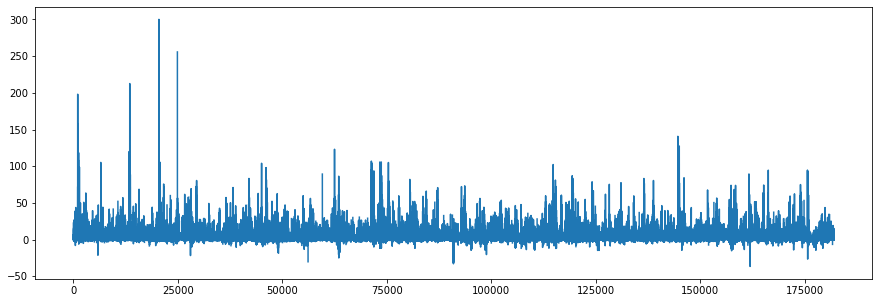

In [38]:
df_sp500_scores[sent_choice_pos].plot(figsize=(15,5))

In [39]:
# identify highly negative score 
#df_sp500_scores[df_sp500_scores[sent_choice_pos]>100]["Companies"]

In [40]:
# consider winsorizing the data

"""from scipy.stats.mstats import winsorize

# test winsorising the top 5 % 
df_main[sent_choice_pos]= winsorize(df_main[sent_choice_pos], limits=[0.0001, 0.1],nan_policy="omit")
df_main[sent_choice_pos].plot(figsize=(15,5))"""

'from scipy.stats.mstats import winsorize\n\n# test winsorising the top 5 % \ndf_main[sent_choice_pos]= winsorize(df_main[sent_choice_pos], limits=[0.0001, 0.1],nan_policy="omit")\ndf_main[sent_choice_pos].plot(figsize=(15,5))'

In [41]:
# Remove missing values (days without news)
df_sp500_scores=df_sp500_scores.dropna()

In [42]:
# Convert Date to the right format
df_sp500_scores.Date=pd.to_datetime(df_sp500_scores["Date"]).dt.date
df_sp500_scores

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Date,Company,Sent_conf_abs_
0,2019-03-01,A,4.847166
1,2019-03-04,A,4.716615
2,2019-03-05,A,-0.806399
3,2019-03-06,A,1.665238
4,2019-03-07,A,4.576530
...,...,...,...
182078,2020-06-09,ZTS,0.932321
182082,2020-06-15,ZTS,0.932321
182083,2020-06-16,ZTS,3.144760
182088,2020-06-23,ZTS,0.932321


In [43]:
""" Laggs through weekends

# Set Company and date as multiindex
df_sp500_scores = df_sp500_scores.set_index(['Company', 'Date'])
df_sp500_scores

# Create lagged returns for each companies' returns
for i in range(1,6):
    df_sp500_scores[sent_choice_pos+'_L'+str(i)] = df_sp500_scores.groupby(level=0)[sent_choice_pos].shift(i)
df_sp500_scores

df_sp500_scores.to_excel("test_score.xlsx")

"""

' Laggs through weekends\n\n# Set Company and date as multiindex\ndf_sp500_scores = df_sp500_scores.set_index([\'Company\', \'Date\'])\ndf_sp500_scores\n\n# Create lagged returns for each companies\' returns\nfor i in range(1,6):\n    df_sp500_scores[sent_choice_pos+\'_L\'+str(i)] = df_sp500_scores.groupby(level=0)[sent_choice_pos].shift(i)\ndf_sp500_scores\n\ndf_sp500_scores.to_excel("test_score.xlsx")\n\n'

### Section 2.3: Merge Panel data

In [44]:
# merge dataframes (left outer)
#df_main = pd.merge(df_sp500_scores, df_excess_returns, left_index=True, right_index=True, how="outer")

# merge dataframes (left - only keep trading days)
df_main = pd.merge(df_ex_ret_transf,df_sp500_scores, on=["Date","Company"], how="left")
df_main

,Company,Date,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_
0,A,2019-03-04,-0.009783,NaN,NaN,NaN,NaN,NaN,4.716615
1,A,2019-03-05,-0.003736,-0.009783,NaN,NaN,NaN,NaN,-0.806399
2,A,2019-03-06,-0.005891,-0.003736,-0.009783,NaN,NaN,NaN,1.665238
3,A,2019-03-07,0.007872,-0.005891,-0.003736,-0.009783,NaN,NaN,4.576530
4,A,2019-03-08,-0.007394,0.007872,-0.005891,-0.003736,-0.009783,NaN,NaN
...,...,...,...,...,...,...,...,...,...
174582,ZTS,2020-06-24,-0.001732,0.004236,-0.009843,0.005649,0.003865,0.007637,NaN
174583,ZTS,2020-06-25,-0.003439,-0.001732,0.004236,-0.009843,0.005649,0.003865,NaN
174584,ZTS,2020-06-26,0.004642,-0.003439,-0.001732,0.004236,-0.009843,0.005649,0.030402
174585,ZTS,2020-06-29,-0.019812,0.004642,-0.003439,-0.001732,0.004236,-0.009843,NaN


In [45]:
# Filter out all companies except the ones analysed by Ahmad
list_comp=["AAPL","BA","CVX","F", "GE","HD","HPE","IBM","INTC","JNJ","MRK","MSFT","PFE","VZ", "WMT"]
#df_main=df_main[df_main.Company.isin(list_comp)]
#dell not constituation anymore

In [46]:
# Set Company and date as multiindex
df_main = df_main.set_index(['Company', 'Date'])
df_main

# Create lagged returns for each companies' returns
for i in range(1,6):
    df_main[sent_choice_pos+'L_'+str(i)] = df_main.groupby(level=0)[sent_choice_pos].shift(i)
df_main

df_main = df_main.reset_index()

In [47]:
# Check that data is stacked
df_main.iloc[33:340]

,Company,Date,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,Sent_conf_abs_L_3,Sent_conf_abs_L_4,Sent_conf_abs_L_5
33,A,2019-04-18,0.008231,-0.025063,-0.035957,-0.006533,-0.007843,-0.007384,NaN,14.958342,3.132451,3.404560,2.751078,1.712216
34,A,2019-04-22,-0.008889,0.008231,-0.025063,-0.035957,-0.006533,-0.007843,NaN,NaN,14.958342,3.132451,3.404560,2.751078
35,A,2019-04-23,-0.008974,-0.008889,0.008231,-0.025063,-0.035957,-0.006533,1.333790,NaN,NaN,14.958342,3.132451,3.404560
36,A,2019-04-24,0.005236,-0.008974,-0.008889,0.008231,-0.025063,-0.035957,NaN,1.333790,NaN,NaN,14.958342,3.132451
37,A,2019-04-25,0.012640,0.005236,-0.008974,-0.008889,0.008231,-0.025063,0.524761,NaN,1.333790,NaN,NaN,14.958342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,A,2020-06-30,-0.003037,0.001496,0.008641,-0.002873,-0.004611,0.004164,NaN,3.526760,4.397426,1.657239,0.420426,0.254527
336,AAL.O,2019-03-04,-0.022678,NaN,NaN,NaN,NaN,NaN,0.327994,NaN,NaN,NaN,NaN,NaN
337,AAL.O,2019-03-05,-0.013400,-0.022678,NaN,NaN,NaN,NaN,3.199854,0.327994,NaN,NaN,NaN,NaN
338,AAL.O,2019-03-06,-0.007620,-0.013400,-0.022678,NaN,NaN,NaN,5.105139,3.199854,0.327994,NaN,NaN,NaN


In [48]:
#df_main=df_main[df_main.Company!="MCO"]

In [49]:
# store to excel
#df_main.to_excel("../01_Data/10_Modelling/50_Stata_Panel_Dataframe.xlsx")

In [50]:
# Interpolate missing values linearly
#df.interpolate(method="linear", axis=0).ffill().bfill()

### Section 2.4: Set up control variables / dummies

In [51]:
dict_days={0:"Mon",
          1:"Tue",
          2:"Wed",
          3:"Thu",
          4:"Fri",
          5:"Sat",
          6:"Sun"}


# Insert controll variable for the day of the week (0=Monday, 6=Sunday)
df_main["Weekday"]=pd.to_datetime(df_main.Date).dt.dayofweek.map(dict_days)
df_main

,Company,Date,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,Sent_conf_abs_L_3,Sent_conf_abs_L_4,Sent_conf_abs_L_5,Weekday
0,A,2019-03-04,-0.009783,NaN,NaN,NaN,NaN,NaN,4.716615,NaN,NaN,NaN,NaN,NaN,Mon
1,A,2019-03-05,-0.003736,-0.009783,NaN,NaN,NaN,NaN,-0.806399,4.716615,NaN,NaN,NaN,NaN,Tue
2,A,2019-03-06,-0.005891,-0.003736,-0.009783,NaN,NaN,NaN,1.665238,-0.806399,4.716615,NaN,NaN,NaN,Wed
3,A,2019-03-07,0.007872,-0.005891,-0.003736,-0.009783,NaN,NaN,4.576530,1.665238,-0.806399,4.716615,NaN,NaN,Thu
4,A,2019-03-08,-0.007394,0.007872,-0.005891,-0.003736,-0.009783,NaN,NaN,4.576530,1.665238,-0.806399,4.716615,NaN,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174582,ZTS,2020-06-24,-0.001732,0.004236,-0.009843,0.005649,0.003865,0.007637,NaN,0.932321,NaN,NaN,NaN,NaN,Wed
174583,ZTS,2020-06-25,-0.003439,-0.001732,0.004236,-0.009843,0.005649,0.003865,NaN,NaN,0.932321,NaN,NaN,NaN,Thu
174584,ZTS,2020-06-26,0.004642,-0.003439,-0.001732,0.004236,-0.009843,0.005649,0.030402,NaN,NaN,0.932321,NaN,NaN,Fri
174585,ZTS,2020-06-29,-0.019812,0.004642,-0.003439,-0.001732,0.004236,-0.009843,NaN,0.030402,NaN,NaN,0.932321,NaN,Mon


In [52]:
# Create dummy for monday
df_main["Monday"]=[1 if x=="Mon" else 0 for x in df_main["Weekday"]]

In [53]:
""""# Insert control variable for January (Tetlock 2007), 
# outcommented as no January in training set 
df_main["January"]=[1 if x==1 else 0 for x in pd.to_datetime(df_main.Date).dt.month]
df_main"""

'"# Insert control variable for January (Tetlock 2007), \n# outcommented as no January in training set \ndf_main["January"]=[1 if x==1 else 0 for x in pd.to_datetime(df_main.Date).dt.month]\ndf_main'

In [56]:
# Remove weekday column
df_main.drop(columns=["Weekday"],inplace=True)
df_main

,Company,Date,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,Sent_conf_abs_L_3,Sent_conf_abs_L_4,Sent_conf_abs_L_5,Monday
0,A,2019-03-04,-0.009783,NaN,NaN,NaN,NaN,NaN,4.716615,NaN,NaN,NaN,NaN,NaN,1
1,A,2019-03-05,-0.003736,-0.009783,NaN,NaN,NaN,NaN,-0.806399,4.716615,NaN,NaN,NaN,NaN,0
2,A,2019-03-06,-0.005891,-0.003736,-0.009783,NaN,NaN,NaN,1.665238,-0.806399,4.716615,NaN,NaN,NaN,0
3,A,2019-03-07,0.007872,-0.005891,-0.003736,-0.009783,NaN,NaN,4.576530,1.665238,-0.806399,4.716615,NaN,NaN,0
4,A,2019-03-08,-0.007394,0.007872,-0.005891,-0.003736,-0.009783,NaN,NaN,4.576530,1.665238,-0.806399,4.716615,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174582,ZTS,2020-06-24,-0.001732,0.004236,-0.009843,0.005649,0.003865,0.007637,NaN,0.932321,NaN,NaN,NaN,NaN,0
174583,ZTS,2020-06-25,-0.003439,-0.001732,0.004236,-0.009843,0.005649,0.003865,NaN,NaN,0.932321,NaN,NaN,NaN,0
174584,ZTS,2020-06-26,0.004642,-0.003439,-0.001732,0.004236,-0.009843,0.005649,0.030402,NaN,NaN,0.932321,NaN,NaN,0
174585,ZTS,2020-06-29,-0.019812,0.004642,-0.003439,-0.001732,0.004236,-0.009843,NaN,0.030402,NaN,NaN,0.932321,NaN,1


In [57]:
# Create Company Dummies (FE Regression)
df_main["Companies"]=df_main["Company"]
df_main=pd.get_dummies(df_main,columns=["Company"], drop_first=True)
df_main

,Date,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,...,Company_XLNX.O,Company_XOM,Company_XRAY.O,Company_XRX,Company_XYL,Company_YUM,Company_ZBH,Company_ZBRA.O,Company_ZION.O,Company_ZTS
0,2019-03-04,-0.009783,NaN,NaN,NaN,NaN,NaN,4.716615,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2019-03-05,-0.003736,-0.009783,NaN,NaN,NaN,NaN,-0.806399,4.716615,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2019-03-06,-0.005891,-0.003736,-0.009783,NaN,NaN,NaN,1.665238,-0.806399,4.716615,...,0,0,0,0,0,0,0,0,0,0
3,2019-03-07,0.007872,-0.005891,-0.003736,-0.009783,NaN,NaN,4.576530,1.665238,-0.806399,...,0,0,0,0,0,0,0,0,0,0
4,2019-03-08,-0.007394,0.007872,-0.005891,-0.003736,-0.009783,NaN,NaN,4.576530,1.665238,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174582,2020-06-24,-0.001732,0.004236,-0.009843,0.005649,0.003865,0.007637,NaN,0.932321,NaN,...,0,0,0,0,0,0,0,0,0,1
174583,2020-06-25,-0.003439,-0.001732,0.004236,-0.009843,0.005649,0.003865,NaN,NaN,0.932321,...,0,0,0,0,0,0,0,0,0,1
174584,2020-06-26,0.004642,-0.003439,-0.001732,0.004236,-0.009843,0.005649,0.030402,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
174585,2020-06-29,-0.019812,0.004642,-0.003439,-0.001732,0.004236,-0.009843,NaN,0.030402,NaN,...,0,0,0,0,0,0,0,0,0,1


In [58]:
# Set index back to Date
df_main= df_main.set_index("Date")
df_main

,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,Sent_conf_abs_L_3,...,Company_XLNX.O,Company_XOM,Company_XRAY.O,Company_XRX,Company_XYL,Company_YUM,Company_ZBH,Company_ZBRA.O,Company_ZION.O,Company_ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-04,-0.009783,NaN,NaN,NaN,NaN,NaN,4.716615,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-03-05,-0.003736,-0.009783,NaN,NaN,NaN,NaN,-0.806399,4.716615,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-03-06,-0.005891,-0.003736,-0.009783,NaN,NaN,NaN,1.665238,-0.806399,4.716615,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-03-07,0.007872,-0.005891,-0.003736,-0.009783,NaN,NaN,4.576530,1.665238,-0.806399,4.716615,...,0,0,0,0,0,0,0,0,0,0
2019-03-08,-0.007394,0.007872,-0.005891,-0.003736,-0.009783,NaN,NaN,4.576530,1.665238,-0.806399,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,-0.001732,0.004236,-0.009843,0.005649,0.003865,0.007637,NaN,0.932321,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
2020-06-25,-0.003439,-0.001732,0.004236,-0.009843,0.005649,0.003865,NaN,NaN,0.932321,NaN,...,0,0,0,0,0,0,0,0,0,1
2020-06-26,0.004642,-0.003439,-0.001732,0.004236,-0.009843,0.005649,0.030402,NaN,NaN,0.932321,...,0,0,0,0,0,0,0,0,0,1


In [59]:
# Export to csv
#df_main.to_csv("../01_Data/10_Modelling/50_Stata_Panel_Dataframe_incl_dummies.csv")

## Section 3: Dynamic Panel regressions

#### Section 3.1: Train-Test Split

In [60]:
"""from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_main, test_size=0.2, random_state=7, shuffle=False)
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")
"""
# use 80% / 20% roughly -> use time series split 

'from sklearn.model_selection import train_test_split\n\ntrain_set, test_set = train_test_split(df_main, test_size=0.2, random_state=7, shuffle=False)\nprint(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")\n'

In [61]:
# Split dataset into train and test sets
train_set=df_main[df_main.index < "2019-10-01"]
test_set_pre_corona=df_main[(df_main.index > "2019-09-30")&(df_main.index < '2020-03-01')]
test_set_corona=df_main[df_main.index > '2020-03-01']
test_set_full=df_main[df_main.index > '2019-09-30']


#test_set_pre_corona=df_main[((df_main.index > "2019-09-30") & (df_main.index < "2020-01-01"))| \
#                            ((df_main.index > '2020-01-31')& (df_main.index < "2020-03-01"))]

#test_set_pre_corona=df_main[(df_main.index > "2019-09-30")&(df_main.index < '2020-01-01')]
#test_set_corona=df_main[df_main.index > '2019-12-31']

In [62]:
train_set.sort_index(ascending=False)

,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,Sent_conf_abs_L_3,...,Company_XLNX.O,Company_XOM,Company_XRAY.O,Company_XRX,Company_XYL,Company_YUM,Company_ZBH,Company_ZBRA.O,Company_ZION.O,Company_ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-30,0.000521,-0.011818,0.012687,-0.008318,0.008177,-0.004202,-1.006503,1.450557,0.932321,NaN,...,0,0,0,0,0,0,0,0,0,1
2019-09-30,0.004771,-0.012711,0.006752,-0.020015,0.007440,-0.000701,14.390237,1.450557,0.868436,3.154612,...,0,0,0,0,0,0,0,0,0,0
2019-09-30,-0.003061,-0.003147,-0.012050,0.006592,0.003026,0.003810,NaN,0.388459,1.716449,-2.029455,...,0,0,0,0,0,0,0,0,0,0
2019-09-30,0.008724,-0.014556,-0.001120,-0.006096,0.014179,-0.012030,1.450557,1.450557,1.121874,0.932321,...,0,0,0,0,0,0,0,0,0,0
2019-09-30,-0.031017,0.009414,0.000199,0.009891,-0.020375,0.008045,1.323866,6.484627,9.515567,6.680966,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-04,0.035082,NaN,NaN,NaN,NaN,NaN,0.768167,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-03-04,-0.002502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-03-04,-0.004105,NaN,NaN,NaN,NaN,NaN,1.741750,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# to excel to check if datasets are filtered correctly
#train_set["Companies"].to_excel("test.xlsx")
#test_set_pre_corona["Companies"].to_excel("test2.xlsx")

#### Section 3.2  Data cleaning and transformation

To build a VAR model, the data needs to be stationary.
To do so, we will firstly test for that using the Augmented Dickey-Fuller (ADF) test and the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) tests.

The test will only be applied on the training data and if necessary any transformations will be applied to both sets.

First, we will test the raw data.

In [64]:
# replace missing data by 0
#train_set=train_set.fillna(0)
train_set

,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,Sent_conf_abs_L_3,...,Company_XLNX.O,Company_XOM,Company_XRAY.O,Company_XRX,Company_XYL,Company_YUM,Company_ZBH,Company_ZBRA.O,Company_ZION.O,Company_ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-04,-0.009783,NaN,NaN,NaN,NaN,NaN,4.716615,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-03-05,-0.003736,-0.009783,NaN,NaN,NaN,NaN,-0.806399,4.716615,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-03-06,-0.005891,-0.003736,-0.009783,NaN,NaN,NaN,1.665238,-0.806399,4.716615,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-03-07,0.007872,-0.005891,-0.003736,-0.009783,NaN,NaN,4.576530,1.665238,-0.806399,4.716615,...,0,0,0,0,0,0,0,0,0,0
2019-03-08,-0.007394,0.007872,-0.005891,-0.003736,-0.009783,NaN,NaN,4.576530,1.665238,-0.806399,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-24,0.008177,-0.004202,0.015759,0.008338,0.006356,0.020655,4.971614,2.438875,12.437392,3.378757,...,0,0,0,0,0,0,0,0,0,1
2019-09-25,-0.008318,0.008177,-0.004202,0.015759,0.008338,0.006356,NaN,4.971614,2.438875,12.437392,...,0,0,0,0,0,0,0,0,0,1
2019-09-26,0.012687,-0.008318,0.008177,-0.004202,0.015759,0.008338,0.932321,NaN,4.971614,2.438875,...,0,0,0,0,0,0,0,0,0,1


In [66]:
# Define columns
list_columns=["Excess_returns",sent_choice_pos]

In [67]:
from statsmodels.tsa.stattools import adfuller, kpss

# implement stationarity check for each timeseries of the selected sentiment measure

# transform the table back to a company per column
train_set_test=train_set.pivot(index=train_set.index,columns="Companies")[sent_choice_pos]
train_set_test

list_results=[]

for x in train_set_test.columns:
    adf_pval = adfuller(train_set_test.fillna(0)[x])[1]
   # print(x)
  #  print(f"ADF, p-value: {adf_pval}")
    kpss_stat, kpss_pval, lags, crit_vals = kpss(train_set_test.fillna(0)[x])
   # print(f"KPSS, p-value: {kpss_pval}")
    
    list_results.append(
        {
            'Company': x,
            'ADF': adf_pval,
            'KPSS':  kpss_pval
        }
    )
    
df_results=pd.DataFrame(list_results)
df_results

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaco

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

,Company,ADF,KPSS
0,A,3.579348e-15,0.1
1,AAL.O,4.812805e-16,0.1
2,AAP,9.165862e-17,0.1
3,AAPL.O,4.491269e-10,0.1
4,ABBV.K,3.572532e-15,0.1
...,...,...,...
513,XYL,1.928191e-20,0.1
514,YUM,2.784383e-21,0.1
515,ZBH,1.719839e-16,0.1
516,ZION.O,6.259928e-06,0.1


In [68]:
# Define function to create stationarity flag
def cond_check(df):
    if (df.ADF < 0.05) and (df.KPSS >0.05):
        return 1
    else:
        return 0
    
# apply function
df_results["stationary_flag"]=df_results.apply(cond_check,axis=1)

# print result
print("Non-stationary Sentiment Timeseries: " + df_results[df_results.stationary_flag==0]["stationary_flag"].count().astype(str))

Non-stationary Sentiment Timeseries: 39


In [69]:
# show companies that fail stationary criterium
list_drop=[]
list_drop=df_results[df_results["stationary_flag"]==0]["Company"]
list_drop[:5]

32     AMCR.K
40     ANET.K
46    APC^H19
59         BA
67     BIIB.O
Name: Company, dtype: object

In [70]:
train_set.shape

(75151, 550)

In [71]:
# drop companies that failed the stationary criterion from dataframe
train_set=train_set[~train_set.Companies.isin(list_drop)]
train_set.shape

(70064, 550)

In [72]:
from statsmodels.tsa.stattools import adfuller, kpss

# implement stationarity check for each timeseries of the selected sentiment measure

# transform the table back to a company per column
train_set_test=train_set.pivot(index=train_set.index,columns="Companies")["Excess_returns"]
train_set_test

list_results=[]

for x in train_set_test.columns:
    adf_pval = adfuller(train_set_test.fillna(0)[x])[1]
   # print(x)
  #  print(f"ADF, p-value: {adf_pval}")
    kpss_stat, kpss_pval, lags, crit_vals = kpss(train_set_test.fillna(0)[x])
   # print(f"KPSS, p-value: {kpss_pval}")
    
    list_results.append(
        {
            'Company': x,
            'ADF': adf_pval,
            'KPSS':  kpss_pval
        }
    )
    
df_results=pd.DataFrame(list_results)
#df_results

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaco

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/Users/jan-lukasclas/opt

In [73]:
df_results["stationary_flag"]=df_results.apply(cond_check,axis=1)
print("Non-stationary Return Timeseries: " + df_results[df_results.stationary_flag==0]["stationary_flag"].count().astype(str))

Non-stationary Return Timeseries: 4


In [74]:
# show companies that fail stationary criterium
list_drop=df_results[df_results["stationary_flag"]==0]["Company"]
list_drop[:5]

38     AMZN.O
314       NEM
322       NRG
457     WDC.O
Name: Company, dtype: object

In [75]:
train_set.shape

(70064, 550)

Returns should be stationary. As they are already differenced. However, some time series are not. Thus, they will be dropped too.

In [76]:
# drop companies that failed the stationary criterion from dataframe
train_set=train_set[~train_set.Companies.isin(list_drop)]
train_set.shape

(69476, 550)

In [77]:
train_set.index.value_counts()

2019-09-27    475
2019-09-26    475
2019-09-30    475
2019-09-25    475
2019-09-24    475
             ... 
2019-03-06    469
2019-03-14    469
2019-03-13    469
2019-03-15    469
2019-03-07    469
Name: Date, Length: 147, dtype: int64

In [78]:
# the dropping of the companies that failed the stationary criterion is performed later 
# in the out of sample performance checks

In [79]:
#df_results.to_excel("1_Results/Stationarity/Stationarity_Test_"+sent_choice_pos+"_results.xlsx")

In [80]:
#train_set[sent_choice_pos].plot(figsize=(16, 4))

Stationarise for avg, abs only by log or differencing.

#### Section 3.2.1  Data Differencing
Log transformation is not possible as 0 are included.
Thus, **differencing** is used.

In [81]:
len(train_set['Companies'].unique())

475

Both tests indicate that all the three series become stationary after first-differencing: the ADF test rejects the null of unit root, and the KPSS test fails to reject the null of stationarity, at the 0.05 significance level. Thus, there is no need to stationarize the data.

#### Drop company column

In [82]:
# drop companies from training datasets
train_set = train_set.drop(['Companies'],axis=1)

#### Section 3.3 Determine the order of the model

In [83]:
#from statsmodels.tsa.vector_ar.var_model import VAR

We can use the `select_order` method to determine the best order: taking the maximum number of lags, the method will build VAR models for each number of lags and output the values of IC for each.

The optimal number of lags are indicated with an asterisk in each column.

In [84]:
#results = VAR(train_set[list_columns]).select_order(maxlags=5)
#results.summary()

All information criteria suggest 5 lags. Let's go for the lag of 5.

### 3.4 Estimate a Dynamic Panel Regression

### 3.4.1 Dynamic Panel Regression for Excess Returns

In [85]:
import statsmodels.api as sm

# drop rows that contain a missing value for returns
train_set.dropna(subset=["ER_L1","ER_L2","ER_L3","ER_L4","ER_L5","Excess_returns"],inplace=True)

# replace nan by 0 for sentiment columns
train_set=train_set.fillna(0)

In [86]:
# transform test data too
# drop rows that contain a missing value for returns
test_set_pre_corona.dropna(subset=["ER_L1","ER_L2","ER_L3","ER_L4","ER_L5","Excess_returns"],inplace=True)
test_set_pre_corona=test_set_pre_corona.fillna(0)

# same for corona testset
test_set_corona.dropna(subset=["ER_L1","ER_L2","ER_L3","ER_L4","ER_L5","Excess_returns"],inplace=True)
test_set_corona=test_set_corona.fillna(0)

# same for full testset
test_set_full.dropna(subset=["ER_L1","ER_L2","ER_L3","ER_L4","ER_L5","Excess_returns"],inplace=True)
test_set_full=test_set_full.fillna(0)

<ipython-input-86-130dc653d3b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set_pre_corona.dropna(subset=["ER_L1","ER_L2","ER_L3","ER_L4","ER_L5","Excess_returns"],inplace=True)
<ipython-input-86-130dc653d3b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set_corona.dropna(subset=["ER_L1","ER_L2","ER_L3","ER_L4","ER_L5","Excess_returns"],inplace=True)
<ipython-input-86-130dc653d3b3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [87]:
train_set

,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,Sent_conf_abs_L_3,...,Company_XLNX.O,Company_XOM,Company_XRAY.O,Company_XRX,Company_XYL,Company_YUM,Company_ZBH,Company_ZBRA.O,Company_ZION.O,Company_ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-11,0.002261,-0.007394,0.007872,-0.005891,-0.003736,-0.009783,1.252449,0.000000,4.576530,1.665238,...,0,0,0,0,0,0,0,0,0,0
2019-03-12,0.004991,0.002261,-0.007394,0.007872,-0.005891,-0.003736,2.042726,1.252449,0.000000,4.576530,...,0,0,0,0,0,0,0,0,0,0
2019-03-13,-0.004447,0.004991,0.002261,-0.007394,0.007872,-0.005891,6.817996,2.042726,1.252449,0.000000,...,0,0,0,0,0,0,0,0,0,0
2019-03-14,0.006858,-0.004447,0.004991,0.002261,-0.007394,0.007872,-0.375738,6.817996,2.042726,1.252449,...,0,0,0,0,0,0,0,0,0,0
2019-03-15,0.001094,0.006858,-0.004447,0.004991,0.002261,-0.007394,4.930400,-0.375738,6.817996,2.042726,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-24,0.008177,-0.004202,0.015759,0.008338,0.006356,0.020655,4.971614,2.438875,12.437392,3.378757,...,0,0,0,0,0,0,0,0,0,1
2019-09-25,-0.008318,0.008177,-0.004202,0.015759,0.008338,0.006356,0.000000,4.971614,2.438875,12.437392,...,0,0,0,0,0,0,0,0,0,1
2019-09-26,0.012687,-0.008318,0.008177,-0.004202,0.015759,0.008338,0.932321,0.000000,4.971614,2.438875,...,0,0,0,0,0,0,0,0,0,1


In [88]:
#x.January.sum()

In [89]:
# Excess returns regression multiply y with 100 to multiply the coefficients with 100
# display impact by 100 (as Ahmad) / same effect as values as %
y=train_set["Excess_returns"]*100
x=train_set.drop(['Excess_returns',sent_choice_pos], axis=1)

In [90]:
x.iloc[:,5:10]

,Sent_conf_abs_L_1,Sent_conf_abs_L_2,Sent_conf_abs_L_3,Sent_conf_abs_L_4,Sent_conf_abs_L_5
Date,,,,,
2019-03-11,0.000000,4.576530,1.665238,-0.806399,4.716615
2019-03-12,1.252449,0.000000,4.576530,1.665238,-0.806399
2019-03-13,2.042726,1.252449,0.000000,4.576530,1.665238
2019-03-14,6.817996,2.042726,1.252449,0.000000,4.576530
2019-03-15,-0.375738,6.817996,2.042726,1.252449,0.000000
...,...,...,...,...,...
2019-09-24,2.438875,12.437392,3.378757,0.000000,0.000000
2019-09-25,4.971614,2.438875,12.437392,3.378757,0.000000
2019-09-26,0.000000,4.971614,2.438875,12.437392,3.378757


In [91]:
# Standard Regression
# take simplest approach if there is no difference
model_ER_plain=sm.OLS(y, x).fit()

# Print the model's summary
print(model_ER_plain.summary())

                                 OLS Regression Results                                
Dep. Variable:         Excess_returns   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.8718
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                       0.980
Time:                        16:54:58   Log-Likelihood:                     -1.1989e+05
No. Observations:               67101   AIC:                                  2.408e+05
Df Residuals:                   66617   BIC:                                  2.452e+05
Df Model:                         484                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [92]:
# save company coefficients to excel
df_dummy_coef = pd.concat((model_ER_plain.params, model_ER_plain.tvalues), axis=1).iloc[11:,:]
df_dummy_coef.index=df_dummy_coef.index.str[8:]
df_dummy_coef=df_dummy_coef.sort_values(by=1)
df_dummy_coef.rename(columns={0: 'beta', 1: 't'}).to_excel('ER_reg_Summary_results.xls', 'sheet1')
df_dummy_coef

,0,1
DXC,-0.551000,-4.519745
ABMD.O,-0.419282,-3.441347
GPS,-0.324427,-2.662747
M,-0.322500,-2.646832
FL,-0.321011,-2.636418
...,...,...
TGT,0.184792,1.516114
KLAC.O,0.185348,1.522801
TSS^I19,0.197376,1.621488
TTWO.O,0.205417,1.687664


In [93]:
# load decils
df_decils=pd.read_excel("RIC and News Quantiles.xlsx",index_col="Unnamed: 0")
df_analyse=df_dummy_coef.merge(df_decils, how="left", left_index=True, right_on="Company")
df_analyse.rename(columns={0:"Coeff", 1:"t-stat"}, inplace=True)
df_analyse.dropna(inplace=True)
df_analyse.head()

,Coeff,t-stat,Company,News_Quantile
158.0,-0.551000,-4.519745,DXC,"(2.974, 3.219]"
6.0,-0.419282,-3.441347,ABMD.O,"(2.974, 3.219]"
219.0,-0.324427,-2.662747,GPS,"(4.043, 4.963]"
310.0,-0.322500,-2.646832,M,"(4.963, 7.387]"
195.0,-0.321011,-2.636418,FL,"(2.778, 2.974]"


In [94]:
(df_analyse.News_Quantile.unique())

array(['(2.974, 3.219]', '(4.043, 4.963]', '(4.963, 7.387]',
       '(2.778, 2.974]', '(7.387, 55.775]', '(2.302, 2.533]',
       '(2.533, 2.778]', '(0.999, 2.302]', '(3.219, 3.569]',
       '(3.569, 4.043]'], dtype=object)

In [95]:
from scipy import stats

df_res=pd.DataFrame()

for c1 in np.sort(df_analyse.News_Quantile.unique()):
    for c2 in np.sort(df_analyse.News_Quantile.unique()):
        t_val, p_val = stats.ttest_ind(df_analyse[df_analyse.News_Quantile==c1]["Coeff"], df_analyse[df_analyse.News_Quantile==c2]["Coeff"])
        df_res.loc[c1, c2] = p_val
df_res

,"(0.999, 2.302]","(2.302, 2.533]","(2.533, 2.778]","(2.778, 2.974]","(2.974, 3.219]","(3.219, 3.569]","(3.569, 4.043]","(4.043, 4.963]","(4.963, 7.387]","(7.387, 55.775]"
"(0.999, 2.302]",1.000000,0.743167,0.986299,0.618783,0.664016,0.462441,0.664656,0.014631,0.170488,0.023483
"(2.302, 2.533]",0.743167,1.000000,0.732768,0.439979,0.511613,0.694501,0.471704,0.009300,0.111526,0.014104
"(2.533, 2.778]",0.986299,0.732768,1.000000,0.632446,0.675469,0.456130,0.678725,0.015997,0.178478,0.025548
"(2.778, 2.974]",0.618783,0.439979,0.632446,1.000000,0.966092,0.255452,0.940662,0.058699,0.404277,0.109181
"(2.974, 3.219]",0.664016,0.511613,0.675469,0.966092,1.000000,0.341916,0.918182,0.124422,0.523178,0.218622
"(3.219, 3.569]",0.462441,0.694501,0.456130,0.255452,0.341916,1.000000,0.272805,0.003838,0.054287,0.005170
"(3.569, 4.043]",0.664656,0.471704,0.678725,0.940662,0.918182,0.272805,1.000000,0.045685,0.353831,0.083835
"(4.043, 4.963]",0.014631,0.009300,0.015997,0.058699,0.124422,0.003838,0.045685,1.000000,0.278990,0.582580
"(4.963, 7.387]",0.170488,0.111526,0.178478,0.404277,0.523178,0.054287,0.353831,0.278990,1.000000,0.505293
"(7.387, 55.775]",0.023483,0.014104,0.025548,0.109181,0.218622,0.005170,0.083835,0.582580,0.505293,1.000000


In [96]:
df_res.to_excel("1_Results/Table of p_vals by media coverage.xlsx")

In [97]:
df_industry=pd.read_excel("RIC and Industry Sector 2.xlsx")
df_analyse=df_analyse.merge(df_industry,how="left",left_on="Company",right_on="RIC")
df_analyse.head()

,Coeff,t-stat,Company,News_Quantile,RIC,ICB Sector
0,-0.551000,-4.519745,DXC,"(2.974, 3.219]",DXC,Technology
1,-0.419282,-3.441347,ABMD.O,"(2.974, 3.219]",ABMD.O,Health Care
2,-0.324427,-2.662747,GPS,"(4.043, 4.963]",GPS,Consumer Discretion
3,-0.322500,-2.646832,M,"(4.963, 7.387]",M,Consumer Discretion
4,-0.321011,-2.636418,FL,"(2.778, 2.974]",FL,Consumer Discretion


In [98]:
table_cross=pd.pivot_table(df_analyse, values=['Company'], index=['ICB Sector'],columns=['News_Quantile'],\
               aggfunc="count")
table_cross.to_excel("Counts industries by coverage.xlsx")
table_cross



Company                                \
News_Quantile       (0.999, 2.302] (2.302, 2.533] (2.533, 2.778]   
ICB Sector                                                         
Basic Materials                2.0            2.0            1.0   
Consumer Discretion            3.0            6.0            5.0   
Consumer Staples               NaN            2.0            4.0   
Energy                         1.0            3.0            2.0   
Financials                     5.0           10.0           10.0   
Health Care                    7.0            1.0            4.0   
Industrials                   18.0           10.0           12.0   
Real Estate                   11.0           11.0            5.0   
Technology                     2.0            2.0            6.0   
Telecommunications             NaN            NaN            NaN   
Utilities                      5.0            6.0            4.0   

                                                                  \
News_Quantile       (2.778, 2.974] (2.974, 3.219] (3.219, 3.569]   
ICB Sector                                                         
Basic Materials                2.0            3.0            5.0   
Consumer Discretion            8.0           11.0           10.0   
Consumer Staples               3.0            5.0            5.0   
Energy                         2.0            2.0            3.0   
Financials                     8.0            4.0            7.0   
Health Care                    5.0            8.0            3.0   
Industrials                   12.0            9.0            7.0   
Real Estate                    3.0            2.0            NaN   
Technology                     9.0            5.0            8.0   
Telecommunications             1.0            1.0            1.0   
Utilities                      1.0            2.0            4.0   

                                                                  \
News_Quantile       (3.569, 4.043] (4.043, 4.963] (4.963, 7.387]   
ICB Sector                                                         
Basic Materials                4.0            NaN            1.0   
Consumer Discretion           12.0           18.0           10.0   
Consumer Staples               2.0            3.0            9.0   
Energy                         3.0            8.0            1.0   
Financials                     7.0            5.0            5.0   
Health Care                    8.0            8.0           12.0   
Industrials                    4.0            6.0            9.0   
Real Estate                    NaN            NaN            NaN   
Technology                     7.0            3.0            4.0   
Telecommunications             3.0            NaN            NaN   
Utilities                      4.0            2.0            2.0   

                                     
News_Quantile       (7.387, 55.775]  
ICB Sector                           
Basic Materials                 NaN  
Consumer Discretion            16.0  
Consumer Staples                NaN  
Energy                          4.0  
Financials                      7.0  
Health Care                     4.0  
Industrials                     6.0  
Real Estate                     NaN  
Technology                     12.0  
Telecommunications              5.0  
Utilities                       NaN

In [99]:
df_res=pd.DataFrame()

for a in np.sort(df_analyse["ICB Sector"].unique()):
    for b in np.sort(df_analyse["ICB Sector"].unique()):
        t_val, p_val = stats.ttest_ind(df_analyse[df_analyse["ICB Sector"]==a]["Coeff"], df_analyse[df_analyse["ICB Sector"]==b]["Coeff"])
        df_res.loc[a, b] = p_val
df_res

,Basic Materials,Consumer Discretion,Consumer Staples,Energy,Financials,Health Care,Industrials,Real Estate,Technology,Telecommunications,Utilities
Basic Materials,1.000000,0.973842,0.112253,1.728718e-02,0.346006,0.894238,1.237085e-01,0.171930,0.538258,0.287740,4.972403e-02
Consumer Discretion,0.973842,1.000000,0.032898,1.542696e-03,0.173398,0.881281,2.312633e-02,0.083458,0.324092,0.247368,2.868510e-02
Consumer Staples,0.112253,0.032898,1.000000,1.070428e-05,0.152970,0.023250,3.352091e-01,0.667241,0.196869,0.831872,9.951871e-01
Energy,0.017287,0.001543,0.000011,1.000000e+00,0.000002,0.002237,8.870297e-09,0.000015,0.000194,0.001750,4.310544e-07
Financials,0.346006,0.173398,0.152970,2.030787e-06,1.000000,0.130081,4.008599e-01,0.343089,0.833234,0.449111,1.026605e-01
Health Care,0.894238,0.881281,0.023250,2.236540e-03,0.130081,1.000000,1.643069e-02,0.056173,0.281153,0.182286,1.354686e-02
Industrials,0.123708,0.023126,0.335209,8.870297e-09,0.400860,0.016431,1.000000e+00,0.696020,0.355121,0.702465,2.835121e-01
Real Estate,0.171930,0.083458,0.667241,1.486872e-05,0.343089,0.056173,6.960195e-01,1.000000,0.368401,0.918502,5.904381e-01
Technology,0.538258,0.324092,0.196869,1.938778e-04,0.833234,0.281153,3.551213e-01,0.368401,1.000000,0.505175,1.625749e-01
Telecommunications,0.287740,0.247368,0.831872,1.750065e-03,0.449111,0.182286,7.024646e-01,0.918502,0.505175,1.000000,7.422454e-01


In [100]:
df_res.to_excel("1_Results/Table of p_vals by industry.xlsx")

In [101]:
# report t-stats
df_res=pd.DataFrame()

for a in np.sort(df_analyse["ICB Sector"].unique()):
    for b in np.sort(df_analyse["ICB Sector"].unique()):
        t_val, p_val = stats.ttest_ind(df_analyse[df_analyse["ICB Sector"]==a]["Coeff"], df_analyse[df_analyse["ICB Sector"]==b]["Coeff"])
        df_res.loc[a, b] = t_val
df_res

,Basic Materials,Consumer Discretion,Consumer Staples,Energy,Financials,Health Care,Industrials,Real Estate,Technology,Telecommunications,Utilities
Basic Materials,0.000000,0.032860,-1.616050,2.467892,-0.947564,0.133378,-1.551166,-1.385894,-0.618251,-1.082980,-2.013162
Consumer Discretion,-0.032860,0.000000,-2.156333,3.237215,-1.367278,0.149589,-2.289892,-1.744473,-0.989230,-1.163062,-2.212984
Consumer Staples,1.616050,2.156333,0.000000,4.805836,1.440185,2.308278,0.967436,0.431967,1.300259,0.213627,0.006057
Energy,-2.467892,-3.237215,-4.805836,0.000000,-5.061546,-3.150278,-6.185414,-4.721367,-3.896658,-3.367102,-5.707610
Financials,0.947564,1.367278,-1.440185,5.061546,0.000000,1.523733,-0.842345,-0.952693,0.210999,-0.760781,-1.647812
Health Care,-0.133378,-0.149589,-2.308278,3.150278,-1.523733,0.000000,-2.426330,-1.934655,-1.082776,-1.347317,-2.519801
Industrials,1.551166,2.289892,-0.967436,6.185414,0.842345,2.426330,0.000000,-0.391616,0.927588,-0.383071,-1.077249
Real Estate,1.385894,1.744473,-0.431967,4.721367,0.952693,1.934655,0.391616,0.000000,0.904118,-0.102954,-0.541106
Technology,0.618251,0.989230,-1.300259,3.896658,-0.210999,1.082776,-0.927588,-0.904118,0.000000,-0.669976,-1.408545
Telecommunications,1.082980,1.163062,-0.213627,3.367102,0.760781,1.347317,0.383071,0.102954,0.669976,0.000000,-0.331228


In [102]:
df_analyse=df_analyse.groupby("News_Quantile").agg("mean")

In [103]:
df_analyse.to_excel("Coefficients by media coverage.xlsx")

In [105]:
# Conduct Regression analysis with Newey and West Standard errors 
#- robust to heteroskedasticity and autocorrelation up to five lags
#model_ER = sm.OLS(y, x).fit()
model_ER=sm.OLS(y, x).fit(cov_type='nw-panel',cov_kwds={'maxlags':5,'time':train_set.index})

# Print the model's summary
print(model_ER.summary())

                                 OLS Regression Results                                
Dep. Variable:         Excess_returns   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.8440
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                       0.968
Time:                        16:55:10   Log-Likelihood:                     -1.1989e+05
No. Observations:               67101   AIC:                                  2.408e+05
Df Residuals:                   66617   BIC:                                  2.452e+05
Df Model:                         484                                                  
Covariance Type:            hac-panel                                                  
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 547, but rank is 484
  warnings.warn('covariance of constraints does not have full '


In [106]:
#print(model_ER.summary2().as_text())

In [107]:
#model_ER.summary(fit)$coefficients[,4]

In [108]:
# produces same results
#model_ER2=model_ER.get_robustcov_results(cov_type='hac-panel',time=train_set.index,maxlags=5)
#print(model_ER2.summary())

In [109]:
# Conduct Regression analysis with Huber-White std errors 
#- robust to heteroskedasticity
model_ER_HW=sm.OLS(y, x).fit(cov_type='HC0')

# Print the model's summary
print(model_ER_HW.summary())

                                 OLS Regression Results                                
Dep. Variable:         Excess_returns   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.8155
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                       0.999
Time:                        16:55:16   Log-Likelihood:                     -1.1989e+05
No. Observations:               67101   AIC:                                  2.408e+05
Df Residuals:                   66617   BIC:                                  2.452e+05
Df Model:                         484                                                  
Covariance Type:                  HC0                                                  
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 547, but rank is 484
  warnings.warn('covariance of constraints does not have full '


### 3.4.2 Dynamic Panel Regression for News Sentiment

In [110]:
# Sentiment regression
y_sent=train_set[sent_choice_pos]*100
x_sent=train_set.drop(['Excess_returns',sent_choice_pos], axis=1)

In [111]:
# Conduct Regression analysis 
#model_sent = sm.OLS(y_sent, x_sent).fit()
model_sent_plain=sm.OLS(y_sent, x_sent).fit()

# Print the model's summary
print(model_sent_plain.summary())

                                 OLS Regression Results                                
Dep. Variable:         Sent_conf_abs_   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                              110.1
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                        0.00
Time:                        16:55:22   Log-Likelihood:                     -5.1109e+05
No. Observations:               67101   AIC:                                  1.023e+06
Df Residuals:                   66617   BIC:                                  1.028e+06
Df Model:                         484                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [112]:
# Conduct Regression analysis 
#model_sent = sm.OLS(y_sent, x_sent).fit()
model_sent=sm.OLS(y_sent, x_sent).fit(cov_type='nw-panel',cov_kwds={'maxlags':5,'time':train_set.index})

# Print the model's summary
print(model_sent.summary())

                                 OLS Regression Results                                
Dep. Variable:         Sent_conf_abs_   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                              62.20
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                   3.01e-288
Time:                        16:55:33   Log-Likelihood:                     -5.1109e+05
No. Observations:               67101   AIC:                                  1.023e+06
Df Residuals:                   66617   BIC:                                  1.028e+06
Df Model:                         484                                                  
Covariance Type:            hac-panel                                                  
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 547, but rank is 484
  warnings.warn('covariance of constraints does not have full '


In [113]:
# Conduct Regression analysis 
#model_sent = sm.OLS(y_sent, x_sent).fit()
model_sent_HW=sm.OLS(y_sent, x_sent).fit(cov_type='HC0')

# Print the model's summary
print(model_sent_HW.summary())

                                 OLS Regression Results                                
Dep. Variable:         Sent_conf_abs_   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                              54.60
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                        0.00
Time:                        16:55:39   Log-Likelihood:                     -5.1109e+05
No. Observations:               67101   AIC:                                  1.023e+06
Df Residuals:                   66617   BIC:                                  1.028e+06
Df Model:                         484                                                  
Covariance Type:                  HC0                                                  
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

/Users/jan-lukasclas/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 547, but rank is 484
  warnings.warn('covariance of constraints does not have full '


In [114]:
#https://github.com/mwburke/stargazer/blob/master/examples.ipynb
from stargazer.stargazer import Stargazer, LineLocation

stargazer = Stargazer([model_ER_plain, model_sent_plain,model_ER,model_sent,model_ER_HW,model_sent_HW])
stargazer.title(sent_choice_pos)
stargazer.custom_columns(['Excess returns', 'Sentiment',\
                          'NW: Excess returns', 'NW: Sentiment',\
                          'HW: Excess returns', 'HW: Sentiment'], [1, 1,1,1,1,1])
stargazer.show_model_numbers(False)
#stargazer.significant_digits(2)
list_relevant=['ER_L1', 'ER_L2', 'ER_L3', 'ER_L4', 'ER_L5',sent_choice_pos+'L_1',sent_choice_pos+'L_2',\
              sent_choice_pos+'L_3',sent_choice_pos+'L_4',sent_choice_pos+'L_5',"Monday"]
stargazer.covariate_order(list_relevant)

#stargazer.rename_covariates({'Age': 'Oldness'})

stargazer.show_degrees_of_freedom(False)
#stargazer.add_custom_notes(['First note', 'Second note'])
stargazer.add_line('Company dummies', ['Yes', 'Yes','Yes','Yes','Yes','Yes'])
#stargazer.add_line('Preferred', ['No', 'Yes'], LineLocation.FOOTER_TOP)

#stargazer.significance_levels([0.1, 0.05, 0.07])
#stargazer.append_notes(False)

stargazer

In [115]:
# Assign the table data to a Pandas dataframe 
table = pd.read_html(stargazer.render_html())
table=table[0][2:]

In [116]:
table

,0,1,2,3,4,5,6
2,NaN,Excess returns,Sentiment,NW: Excess returns,NW: Sentiment,HW: Excess returns,HW: Sentiment
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ER_L1,1.214***,450.376***,1.214**,450.376**,1.214**,450.376**
5,NaN,(0.388),(131.929),(0.550),(177.254),(0.586),(180.229)
6,ER_L2,-1.224***,-83.648,-1.224**,-83.648,-1.224**,-83.648
7,NaN,(0.388),(132.063),(0.494),(137.666),(0.495),(135.975)
8,ER_L3,0.904**,-74.385,0.904*,-74.385,0.904*,-74.385
9,NaN,(0.388),(131.997),(0.467),(124.975),(0.475),(125.246)
10,ER_L4,-0.121,-108.109,-0.121,-108.109,-0.121,-108.109
11,NaN,(0.388),(131.968),(0.465),(130.720),(0.476),(129.424)


In [117]:
df_table=pd.DataFrame(table)
df_table.to_excel("1_Results/Train_Regression results_"+sent_choice_pos+".xlsx")

In [118]:
# Refit Excess returns regression with regular coefficient
y=train_set["Excess_returns"]
x=train_set.drop(['Excess_returns',sent_choice_pos], axis=1)

# Standard Regression
# take simplest approach if there is no difference
model_ER_plain=sm.OLS(y, x).fit()

# Print the model's summary
print(model_ER_plain.summary())

# Sentiment regression
y_sent=train_set[sent_choice_pos]
x_sent=train_set.drop(['Excess_returns',sent_choice_pos], axis=1)


# Conduct Regression analysis 
#model_sent = sm.OLS(y_sent, x_sent).fit()
model_sent_plain=sm.OLS(y_sent, x_sent).fit()

# Print the model's summary
print(model_sent_plain.summary())

                                 OLS Regression Results                                
Dep. Variable:         Excess_returns   R-squared (uncentered):                   0.006
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.8718
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                       0.980
Time:                        16:55:48   Log-Likelihood:                      1.8912e+05
No. Observations:               67101   AIC:                                 -3.773e+05
Df Residuals:                   66617   BIC:                                 -3.729e+05
Df Model:                         484                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

                                 OLS Regression Results                                
Dep. Variable:         Sent_conf_abs_   R-squared (uncentered):                   0.444
Model:                            OLS   Adj. R-squared (uncentered):              0.440
Method:                 Least Squares   F-statistic:                              110.1
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                        0.00
Time:                        16:56:00   Log-Likelihood:                     -2.0208e+05
No. Observations:               67101   AIC:                                  4.051e+05
Df Residuals:                   66617   BIC:                                  4.095e+05
Df Model:                         484                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

# 4. Evaluate the model on test data

The procedure to forecast returns only for the next day, retrain the model and forecast again takes too long.
Thus, we decided to conduct the out-of-sample testing with the basic model only.

### Calculate accuracy measures

In [119]:
def get_mda_orig(y, yhat):
    """Mean Directional Accuracy, as per:
    https://www.wikiwand.com/en/Mean_Directional_Accuracy
    """
    
    a = np.sign(np.diff(y))
    b = np.sign(np.diff(yhat))
    
    return np.sum(a == b)/a.shape[0]


from sklearn.metrics import mean_squared_error

**Baseline**

Pre Corona

In [120]:
test_set_pre_corona = test_set_pre_corona.reset_index()
test_set_corona = test_set_corona.reset_index()
test_set_pre_corona.head()

,Date,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,...,Company_XLNX.O,Company_XOM,Company_XRAY.O,Company_XRX,Company_XYL,Company_YUM,Company_ZBH,Company_ZBRA.O,Company_ZION.O,Company_ZTS
0,2019-10-01,-0.011101,-0.001906,0.003617,0.004918,-0.001420,-0.018358,-1.935319,2.017965,2.007307,...,0,0,0,0,0,0,0,0,0,0
1,2019-10-02,-0.002006,-0.011101,-0.001906,0.003617,0.004918,-0.001420,8.874015,-1.935319,2.017965,...,0,0,0,0,0,0,0,0,0,0
2,2019-10-03,-0.000883,-0.002006,-0.011101,-0.001906,0.003617,0.004918,5.707593,8.874015,-1.935319,...,0,0,0,0,0,0,0,0,0,0
3,2019-10-04,0.012993,-0.000883,-0.002006,-0.011101,-0.001906,0.003617,1.143793,5.707593,8.874015,...,0,0,0,0,0,0,0,0,0,0
4,2019-10-07,-0.005801,0.012993,-0.000883,-0.002006,-0.011101,-0.001906,0.885844,1.143793,5.707593,...,0,0,0,0,0,0,0,0,0,0


In [121]:
# use mean return to create baseline for each company
train_set=df_main[df_main.index < "2019-10-01"]
# calculate mean by company
comp_mean=train_set.groupby('Companies')["Excess_returns"].agg('mean')
comp_mean=comp_mean.reset_index().rename(columns={"Excess_returns": "mean_return"})

comp_mean

,Companies,mean_return
0,A,-0.000686
1,AAL.O,-0.001894
2,AAP,-0.000114
3,AAPL.O,0.001370
4,ABBV.K,-0.000648
...,...,...
513,XYL,-0.000072
514,YUM,0.000781
515,ZBH,0.000271
516,ZION.O,-0.001232


In [122]:
# merge returns on pre corona testset and drop all companies that were non-stationary  by using "inner"
test_set_pre_corona=test_set_pre_corona.merge(comp_mean, how="inner", left_on="Companies",right_on="Companies")

# merge returns on  corona testset and drop all companies that were non-stationary  by using "inner"
test_set_corona=test_set_corona.merge(comp_mean, how="inner", left_on="Companies",right_on="Companies")

# merge returns on  full testset and drop all companies that were non-stationary  by using "inner"
test_set_full=test_set_full.merge(comp_mean, how="inner", left_on="Companies",right_on="Companies")

In [123]:
test_set_pre_corona.head()

,Date,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,...,Company_XOM,Company_XRAY.O,Company_XRX,Company_XYL,Company_YUM,Company_ZBH,Company_ZBRA.O,Company_ZION.O,Company_ZTS,mean_return
0,2019-10-01,-0.011101,-0.001906,0.003617,0.004918,-0.001420,-0.018358,-1.935319,2.017965,2.007307,...,0,0,0,0,0,0,0,0,0,-0.000686
1,2019-10-02,-0.002006,-0.011101,-0.001906,0.003617,0.004918,-0.001420,8.874015,-1.935319,2.017965,...,0,0,0,0,0,0,0,0,0,-0.000686
2,2019-10-03,-0.000883,-0.002006,-0.011101,-0.001906,0.003617,0.004918,5.707593,8.874015,-1.935319,...,0,0,0,0,0,0,0,0,0,-0.000686
3,2019-10-04,0.012993,-0.000883,-0.002006,-0.011101,-0.001906,0.003617,1.143793,5.707593,8.874015,...,0,0,0,0,0,0,0,0,0,-0.000686
4,2019-10-07,-0.005801,0.012993,-0.000883,-0.002006,-0.011101,-0.001906,0.885844,1.143793,5.707593,...,0,0,0,0,0,0,0,0,0,-0.000686


In [124]:
test_set_corona.head()

,Date,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,...,Company_XOM,Company_XRAY.O,Company_XRX,Company_XYL,Company_YUM,Company_ZBH,Company_ZBRA.O,Company_ZION.O,Company_ZTS,mean_return
0,2020-03-02,0.017539,0.003589,0.035458,0.005831,-0.001397,-0.020207,1.893219,0.308370,1.252449,...,0,0,0,0,0,0,0,0,0,-0.000686
1,2020-03-03,0.007979,0.017539,0.003589,0.035458,0.005831,-0.001397,6.486539,1.893219,0.308370,...,0,0,0,0,0,0,0,0,0,-0.000686
2,2020-03-04,0.007972,0.007979,0.017539,0.003589,0.035458,0.005831,6.055868,6.486539,1.893219,...,0,0,0,0,0,0,0,0,0,-0.000686
3,2020-03-05,-0.012195,0.007972,0.007979,0.017539,0.003589,0.035458,3.004748,6.055868,6.486539,...,0,0,0,0,0,0,0,0,0,-0.000686
4,2020-03-06,-0.006560,-0.012195,0.007972,0.007979,0.017539,0.003589,0.000000,3.004748,6.055868,...,0,0,0,0,0,0,0,0,0,-0.000686


In [125]:
# double-check calculation
#test_set_pre_corona.loc["A"]["Excess_returns"].mean()

In [126]:
# find predom sign in training set
np.sign(train_set.Excess_returns).sum()

459.0

As np.sign() returns -1 / 1 indicating the sign, from the summing the fields value, we can obtain the predominant sign. As the calculated sum is positive, we can conclude that the predom. sign is positive.

In [127]:
# show only positive
np.sign(train_set.Excess_returns)[np.sign(train_set.Excess_returns)>0]

Date
2019-03-07    1.0
2019-03-11    1.0
2019-03-12    1.0
2019-03-14    1.0
2019-03-15    1.0
             ... 
2019-09-19    1.0
2019-09-20    1.0
2019-09-24    1.0
2019-09-26    1.0
2019-09-30    1.0
Name: Excess_returns, Length: 37805, dtype: float64

In [128]:
# show only negative
np.sign(train_set.Excess_returns)[np.sign(train_set.Excess_returns)<0]

Date
2019-03-04   -1.0
2019-03-05   -1.0
2019-03-06   -1.0
2019-03-08   -1.0
2019-03-13   -1.0
             ... 
2019-09-13   -1.0
2019-09-16   -1.0
2019-09-23   -1.0
2019-09-25   -1.0
2019-09-27   -1.0
Name: Excess_returns, Length: 37346, dtype: float64

In [129]:
# double check computation
#test_set_pre_corona.loc["A"]["return_sign"].sum()

In [130]:
test_set_pre_corona["Excess_returns"]

0       -0.011101
1       -0.002006
2       -0.000883
3        0.012993
4       -0.005801
           ...   
53864    0.006515
53865    0.004483
53866    0.013644
53867    0.028005
53868    0.002863
Name: Excess_returns, Length: 53869, dtype: float64

## Calculate RMSE / MDA per company and average score for the full test set by industry

In [131]:
# join industries to trainingset
df_industry=pd.read_excel("RIC and Industry Sector 2.xlsx")
df_industry.head()

,RIC,ICB Sector
0,A,Health Care
1,NRG,Utilities
2,NOV,Energy
3,NOC,Industrials
4,NLSN.K,Consumer Discretion


In [132]:
test_set_full.shape

(97899, 551)

In [133]:
#join data on test set
test_set_full=test_set_full.merge(df_industry,how="left",left_on="Companies",right_on="RIC")
test_set_full.shape

(97899, 553)

In [134]:
test_set_full.Companies

0          A
1          A
2          A
3          A
4          A
        ... 
97894    ZTS
97895    ZTS
97896    ZTS
97897    ZTS
97898    ZTS
Name: Companies, Length: 97899, dtype: object

In [135]:
test_set_full.drop_duplicates(subset="Companies")["ICB Sector"].value_counts()

Consumer Discretion    96
Industrials            87
Financials             68
Health Care            57
Technology             55
Consumer Staples       34
Real Estate            32
Utilities              30
Energy                 29
Basic Materials        19
Telecommunications     11
Name: ICB Sector, dtype: int64

In [136]:
test_set_full[test_set_full["ICB Sector"].isnull()]["Companies"].value_counts()

Series([], Name: Companies, dtype: int64)

In [137]:
df_industry_results=pd.DataFrame()
df_industry_results["Industry"]=test_set_full["ICB Sector"].unique()
df_industry_results

,Industry
0,Health Care
1,Consumer Discretion
2,Technology
3,Consumer Staples
4,Industrials
5,Utilities
6,Financials
7,Real Estate
8,Basic Materials
9,Energy


In [138]:
# Return MDA

# mean baseline

list_scores=[]
for i in test_set_full["ICB Sector"].unique()[:]:
    x=get_mda_orig(test_set_full[test_set_full["ICB Sector"]==i]["Excess_returns"],\
                   test_set_full[test_set_full["ICB Sector"]==i]["mean_return"])
    list_scores.append(x)

#return mean score per company
df_industry_results["MDA_mean"]=list_scores
#df_industry_results.head()

# persistence baseline

list_scores=[]
for i in test_set_full["ICB Sector"].unique()[:]:
    x=get_mda_orig(test_set_full[test_set_full["ICB Sector"]==i]["Excess_returns"],\
                   test_set_full[test_set_full["ICB Sector"]==i]["ER_L1"])
    list_scores.append(x)

df_industry_results["MDA_pers"]=list_scores
#df_industry_results.head()


# positive baseline

list_scores=[]
for i in test_set_full["ICB Sector"].unique()[:]:
    x=get_mda_orig(test_set_full[test_set_full["ICB Sector"]==i]["Excess_returns"],\
                    np.arange(test_set_full[test_set_full["ICB Sector"]==i]["mean_return"].shape[0]))
    list_scores.append(x)
    
df_industry_results["MDA_pos"]=list_scores
df_industry_results

,Industry,MDA_mean,MDA_pers,MDA_pos
0,Health Care,0.002414,0.325473,0.507055
1,Consumer Discretion,0.002426,0.325028,0.500551
2,Technology,0.003079,0.323744,0.505292
3,Consumer Staples,0.003268,0.315486,0.502101
4,Industrials,0.002372,0.336395,0.498601
5,Utilities,0.002470,0.330393,0.504322
6,Financials,0.003190,0.328301,0.489845
7,Real Estate,0.002811,0.327931,0.489995
8,Basic Materials,0.003064,0.340390,0.490251
9,Energy,0.003285,0.335766,0.488321


In [139]:
# RMSE 

list_scores=[]
for i in test_set_full["ICB Sector"].unique()[:]:
    x=np.sqrt(mean_squared_error(test_set_full[test_set_full["ICB Sector"]==i]["Excess_returns"],\
                   test_set_full[test_set_full["ICB Sector"]==i]["mean_return"]))
    list_scores.append(x)

df_industry_results["RMSE_mean"]=list_scores


list_scores=[]
for i in test_set_full["ICB Sector"].unique()[:]:
    x= np.sqrt(mean_squared_error(test_set_full[test_set_full["ICB Sector"]==i]["Excess_returns"],\
                   test_set_full[test_set_full["ICB Sector"]==i]["ER_L1"]))
    list_scores.append(x)

df_industry_results["RMSE_pers"]=list_scores
df_industry_results

,Industry,MDA_mean,MDA_pers,MDA_pos,RMSE_mean,RMSE_pers
0,Health Care,0.002414,0.325473,0.507055,0.021978,0.031514
1,Consumer Discretion,0.002426,0.325028,0.500551,0.032821,0.044192
2,Technology,0.003079,0.323744,0.505292,0.022048,0.031928
3,Consumer Staples,0.003268,0.315486,0.502101,0.021533,0.030844
4,Industrials,0.002372,0.336395,0.498601,0.022452,0.031122
5,Utilities,0.002470,0.330393,0.504322,0.019516,0.027149
6,Financials,0.003190,0.328301,0.489845,0.024263,0.034180
7,Real Estate,0.002811,0.327931,0.489995,0.026335,0.035958
8,Basic Materials,0.003064,0.340390,0.490251,0.024792,0.034730
9,Energy,0.003285,0.335766,0.488321,0.041665,0.057432


In [140]:
test_set_full.head()

,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,Sent_conf_abs_L_3,...,Company_XRX,Company_XYL,Company_YUM,Company_ZBH,Company_ZBRA.O,Company_ZION.O,Company_ZTS,mean_return,RIC,ICB Sector
0,-0.011101,-0.001906,0.003617,0.004918,-0.001420,-0.018358,-1.935319,2.017965,2.007307,0.193739,...,0,0,0,0,0,0,0,-0.000686,A,Health Care
1,-0.002006,-0.011101,-0.001906,0.003617,0.004918,-0.001420,8.874015,-1.935319,2.017965,2.007307,...,0,0,0,0,0,0,0,-0.000686,A,Health Care
2,-0.000883,-0.002006,-0.011101,-0.001906,0.003617,0.004918,5.707593,8.874015,-1.935319,2.017965,...,0,0,0,0,0,0,0,-0.000686,A,Health Care
3,0.012993,-0.000883,-0.002006,-0.011101,-0.001906,0.003617,1.143793,5.707593,8.874015,-1.935319,...,0,0,0,0,0,0,0,-0.000686,A,Health Care
4,-0.005801,0.012993,-0.000883,-0.002006,-0.011101,-0.001906,0.885844,1.143793,5.707593,8.874015,...,0,0,0,0,0,0,0,-0.000686,A,Health Care


In [141]:
# split dependent and independent variables
x_test_full=test_set_full.drop(['Excess_returns',\
                                       sent_choice_pos,"mean_return","RIC","ICB Sector",'Companies'], axis=1)

y_test_full=test_set_full["Excess_returns"]

In [142]:
# predict all values straight
y_hat_full = model_ER_plain.predict(x_test_full)
y_hat_full

0        0.000014
1       -0.000109
2        0.000366
3        0.000190
4        0.000422
           ...   
97894    0.001738
97895    0.001326
97896    0.001523
97897    0.001681
97898    0.001151
Length: 97899, dtype: float64

In [143]:
#include in orgi datafram
test_set_full["y_hat"]=y_hat_full

In [144]:
# MDA

list_scores=[]
for i in test_set_full["ICB Sector"].unique()[:]:
    x=get_mda_orig(test_set_full[test_set_full["ICB Sector"]==i]["Excess_returns"],\
                   test_set_full[test_set_full["ICB Sector"]==i]["y_hat"])
    list_scores.append(x)

df_industry_results["MDA_dynp"]=list_scores
#df_industry_results.head()

In [145]:
# RMSE 

list_scores=[]
for i in test_set_full["ICB Sector"].unique()[:]:
    x=np.sqrt(mean_squared_error(test_set_full[test_set_full["ICB Sector"]==i]["Excess_returns"],\
                   test_set_full[test_set_full["ICB Sector"]==i]["y_hat"]))
    list_scores.append(x)

df_industry_results["RMSE_dynp"]=list_scores

In [146]:
df_industry_results

,Industry,MDA_mean,MDA_pers,MDA_pos,RMSE_mean,RMSE_pers,MDA_dynp,RMSE_dynp
0,Health Care,0.002414,0.325473,0.507055,0.021978,0.031514,0.409488,0.021977
1,Consumer Discretion,0.002426,0.325028,0.500551,0.032821,0.044192,0.414223,0.032775
2,Technology,0.003079,0.323744,0.505292,0.022048,0.031928,0.411295,0.022057
3,Consumer Staples,0.003268,0.315486,0.502101,0.021533,0.030844,0.402023,0.021578
4,Industrials,0.002372,0.336395,0.498601,0.022452,0.031122,0.421117,0.022458
5,Utilities,0.002470,0.330393,0.504322,0.019516,0.027149,0.401129,0.019497
6,Financials,0.003190,0.328301,0.489845,0.024263,0.034180,0.421057,0.024295
7,Real Estate,0.002811,0.327931,0.489995,0.026335,0.035958,0.403837,0.026365
8,Basic Materials,0.003064,0.340390,0.490251,0.024792,0.034730,0.422563,0.024788
9,Energy,0.003285,0.335766,0.488321,0.041665,0.057432,0.406022,0.041648


In [147]:
df_industry_results.to_excel("1_Results/OOS_Industry performance.xlsx")

## Calculate RMSE / MDA per company and average score for the full test set by media coverage

In [148]:
# join industries to trainingset
df_decils=pd.read_excel("RIC and News Quantiles.xlsx",index_col="Unnamed: 0")
df_decils.head()

,Company,News_Quantile
0,A,"(2.974, 3.219]"
1,AAL.O,"(7.387, 55.775]"
2,AAP,"(2.778, 2.974]"
3,AAPL.O,"(7.387, 55.775]"
4,ABBV.K,"(4.963, 7.387]"


In [149]:
test_set_full.shape

(97899, 554)

In [150]:
#join data on test set
test_set_full=test_set_full.merge(df_decils, how="left", left_on="Companies", right_on="Company")
test_set_full.shape

(97899, 556)

In [151]:
test_set_full[test_set_full["News_Quantile"].isnull()]["Companies"].value_counts()

KTB       189
MYL.OQ    189
MCO       189
Name: Companies, dtype: int64

In [152]:
test_set_full.drop_duplicates(subset="Company")["News_Quantile"].value_counts()
test_set_full.dropna(subset=["News_Quantile"], inplace=True)

In [153]:
df_decils_results=pd.DataFrame()
df_decils_results["News_Quantile"]=test_set_full["News_Quantile"].unique()

In [154]:
# Return MDA

# mean baseline

list_scores=[]
for i in test_set_full["News_Quantile"].unique()[:]:
    x=get_mda_orig(test_set_full[test_set_full["News_Quantile"]==i]["Excess_returns"],\
                   test_set_full[test_set_full["News_Quantile"]==i]["mean_return"])
    list_scores.append(x)

#return mean score per company
df_decils_results["MDA_mean"]=list_scores
#df_industry_results.head()

# persistence baseline

list_scores=[]
for i in test_set_full["News_Quantile"].unique()[:]:
    x=get_mda_orig(test_set_full[test_set_full["News_Quantile"]==i]["Excess_returns"],\
                   test_set_full[test_set_full["News_Quantile"]==i]["ER_L1"])
    list_scores.append(x)

df_decils_results["MDA_pers"]=list_scores
#df_industry_results.head()


# positive baseline

list_scores=[]
for i in test_set_full["News_Quantile"].unique()[:]:
    x=get_mda_orig(test_set_full[test_set_full["News_Quantile"]==i]["Excess_returns"],\
                    np.arange(test_set_full[test_set_full["News_Quantile"]==i]["mean_return"].shape[0]))
    list_scores.append(x)
    
df_decils_results["MDA_pos"]=list_scores
df_decils_results

,News_Quantile,MDA_mean,MDA_pers,MDA_pos
0,"(2.974, 3.219]",0.002748,0.331536,0.503918
1,"(7.387, 55.775]",0.002548,0.327095,0.498187
2,"(2.778, 2.974]",0.002857,0.331675,0.494232
3,"(4.963, 7.387]",0.002951,0.327669,0.499949
4,"(4.043, 4.963]",0.002696,0.332169,0.499700
5,"(3.219, 3.569]",0.002995,0.324581,0.499900
6,"(2.533, 2.778]",0.002895,0.323383,0.497404
7,"(2.302, 2.533]",0.002796,0.329872,0.496506
8,"(3.569, 4.043]",0.002196,0.329173,0.499800
9,"(0.999, 2.302]",0.002899,0.330981,0.495463


In [155]:
test_set_full["News_Quantile"].isna().sum()

0

In [156]:
# RMSE 

list_scores=[]
for i in test_set_full["News_Quantile"].unique()[:]:
    x=np.sqrt(mean_squared_error(test_set_full[test_set_full["News_Quantile"]==i]["Excess_returns"],\
                   test_set_full[test_set_full["News_Quantile"]==i]["mean_return"]))
    list_scores.append(x)

df_decils_results["RMSE_mean"]=list_scores


list_scores=[]
for i in test_set_full["News_Quantile"].unique()[:]:
    x= np.sqrt(mean_squared_error(test_set_full[test_set_full["News_Quantile"]==i]["Excess_returns"],\
                   test_set_full[test_set_full["News_Quantile"]==i]["ER_L1"]))
    list_scores.append(x)

df_decils_results["RMSE_pers"]=list_scores
df_decils_results

,News_Quantile,MDA_mean,MDA_pers,MDA_pos,RMSE_mean,RMSE_pers
0,"(2.974, 3.219]",0.002748,0.331536,0.503918,0.028295,0.039341
1,"(7.387, 55.775]",0.002548,0.327095,0.498187,0.026466,0.035995
2,"(2.778, 2.974]",0.002857,0.331675,0.494232,0.022606,0.032098
3,"(4.963, 7.387]",0.002951,0.327669,0.499949,0.026694,0.036588
4,"(4.043, 4.963]",0.002696,0.332169,0.499700,0.031011,0.042762
5,"(3.219, 3.569]",0.002995,0.324581,0.499900,0.025868,0.036215
6,"(2.533, 2.778]",0.002895,0.323383,0.497404,0.023099,0.032488
7,"(2.302, 2.533]",0.002796,0.329872,0.496506,0.025815,0.035504
8,"(3.569, 4.043]",0.002196,0.329173,0.499800,0.027237,0.037882
9,"(0.999, 2.302]",0.002899,0.330981,0.495463,0.023866,0.033147


In [157]:
test_set_full.head()

,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,Sent_conf_abs_L_3,...,Company_ZBH,Company_ZBRA.O,Company_ZION.O,Company_ZTS,mean_return,RIC,ICB Sector,y_hat,Company,News_Quantile
0,-0.011101,-0.001906,0.003617,0.004918,-0.001420,-0.018358,-1.935319,2.017965,2.007307,0.193739,...,0,0,0,0,-0.000686,A,Health Care,0.000014,A,"(2.974, 3.219]"
1,-0.002006,-0.011101,-0.001906,0.003617,0.004918,-0.001420,8.874015,-1.935319,2.017965,2.007307,...,0,0,0,0,-0.000686,A,Health Care,-0.000109,A,"(2.974, 3.219]"
2,-0.000883,-0.002006,-0.011101,-0.001906,0.003617,0.004918,5.707593,8.874015,-1.935319,2.017965,...,0,0,0,0,-0.000686,A,Health Care,0.000366,A,"(2.974, 3.219]"
3,0.012993,-0.000883,-0.002006,-0.011101,-0.001906,0.003617,1.143793,5.707593,8.874015,-1.935319,...,0,0,0,0,-0.000686,A,Health Care,0.000190,A,"(2.974, 3.219]"
4,-0.005801,0.012993,-0.000883,-0.002006,-0.011101,-0.001906,0.885844,1.143793,5.707593,8.874015,...,0,0,0,0,-0.000686,A,Health Care,0.000422,A,"(2.974, 3.219]"


In [158]:
# split dependent and independent variables
x_test_full=test_set_full.drop(['Excess_returns',\
                                       sent_choice_pos,"mean_return","RIC","ICB Sector",'Companies',"Company","News_Quantile","y_hat"], axis=1)

y_test_full=test_set_full["Excess_returns"]

In [159]:
# predict all values straight
y_hat_full = model_ER_plain.predict(x_test_full)
y_hat_full

0        0.000014
1       -0.000109
2        0.000366
3        0.000190
4        0.000422
           ...   
97894    0.001738
97895    0.001326
97896    0.001523
97897    0.001681
97898    0.001151
Length: 97332, dtype: float64

In [160]:
# include in orginal dataframe
test_set_full["y_hat"]=y_hat_full

In [161]:
# MDA

list_scores=[]
for i in test_set_full["News_Quantile"].unique()[:]:
    x=get_mda_orig(test_set_full[test_set_full["News_Quantile"]==i]["Excess_returns"],\
                   test_set_full[test_set_full["News_Quantile"]==i]["y_hat"])
    list_scores.append(x)

df_decils_results["MDA_dynp"]=list_scores
#df_industry_results.head()

In [162]:
# RMSE 

list_scores=[]
for i in test_set_full["News_Quantile"].unique()[:]:
    x=np.sqrt(mean_squared_error(test_set_full[test_set_full["News_Quantile"]==i]["Excess_returns"],\
                   test_set_full[test_set_full["News_Quantile"]==i]["y_hat"]))
    list_scores.append(x)

df_decils_results["RMSE_dynp"]=list_scores

In [163]:
df_decils_results

,News_Quantile,MDA_mean,MDA_pers,MDA_pos,RMSE_mean,RMSE_pers,MDA_dynp,RMSE_dynp
0,"(2.974, 3.219]",0.002748,0.331536,0.503918,0.028295,0.039341,0.415895,0.028302
1,"(7.387, 55.775]",0.002548,0.327095,0.498187,0.026466,0.035995,0.421460,0.026476
2,"(2.778, 2.974]",0.002857,0.331675,0.494232,0.022606,0.032098,0.413060,0.022589
3,"(4.963, 7.387]",0.002951,0.327669,0.499949,0.026694,0.036588,0.412028,0.026693
4,"(4.043, 4.963]",0.002696,0.332169,0.499700,0.031011,0.042762,0.420128,0.031006
5,"(3.219, 3.569]",0.002995,0.324581,0.499900,0.025868,0.036215,0.408047,0.025879
6,"(2.533, 2.778]",0.002895,0.323383,0.497404,0.023099,0.032488,0.404453,0.023115
7,"(2.302, 2.533]",0.002796,0.329872,0.496506,0.025815,0.035504,0.414038,0.025823
8,"(3.569, 4.043]",0.002196,0.329173,0.499800,0.027237,0.037882,0.415136,0.027238
9,"(0.999, 2.302]",0.002899,0.330981,0.495463,0.023866,0.033147,0.407109,0.023775


In [164]:
df_decils_results.to_excel("1_Results/OOS_News coverage performance.xlsx")

# Calculate RMSE / MDA per company and average score for the full test set

In [165]:
# Return MDA

# mean baseline

list_scores=[]
for i in test_set_full.Companies.unique()[:]:
    x=get_mda_orig(test_set_full[test_set_full.Companies==i]["Excess_returns"],\
                   test_set_full[test_set_full.Companies==i]["mean_return"])
    list_scores.append(x)

#return mean score per company
mean_bl_mda=np.mean(list_scores)
print(mean_bl_mda)

# persistence baseline

list_scores=[]
for i in test_set_full.Companies.unique()[:]:
    x=get_mda_orig(test_set_full[test_set_full.Companies==i]["Excess_returns"],\
                   test_set_full[test_set_full.Companies==i]["ER_L1"])
    list_scores.append(x)

#return mean score per company
per_bl_mda=np.mean(list_scores)
print(per_bl_mda)

# positive baseline

list_scores=[]
for i in test_set_full.Companies.unique()[:]:
    x=get_mda_orig(test_set_full[test_set_full.Companies==i]["Excess_returns"],\
                    np.arange(test_set_full[test_set_full.Companies==i]["mean_return"].shape[0]))
    list_scores.append(x)
    
up_bl_mda=np.mean(list_scores)

#return mean score per company
print(up_bl_mda)

0.0
0.3280516087250233
0.4985079584852359


In [166]:
# RMSE 

list_scores=[]
for i in test_set_full.Companies.unique()[:]:
    x=np.sqrt(mean_squared_error(test_set_full[test_set_full.Companies==i]["Excess_returns"],\
                   test_set_full[test_set_full.Companies==i]["mean_return"]))
    list_scores.append(x)

#return mean score per company
mean_bl_rmse=np.mean(list_scores)
print(mean_bl_rmse)

list_scores=[]
for i in test_set_full.Companies.unique()[:]:
    x= np.sqrt(mean_squared_error(test_set_full[test_set_full.Companies==i]["Excess_returns"],\
                   test_set_full[test_set_full.Companies==i]["ER_L1"]))
    list_scores.append(x)

#return mean score per company
per_bl_rmse=np.mean(list_scores)
print(per_bl_rmse)

0.024359900971571584
0.03413198465323975


# Calculate RMSE / MDA per company and average score by Corona split

In [167]:
# Return MDA

# Pre Corona
# mean baseline

list_scores=[]
for i in test_set_pre_corona.Companies.unique()[:]:
    x=get_mda_orig(test_set_pre_corona[test_set_pre_corona.Companies==i]["Excess_returns"],\
                   test_set_pre_corona[test_set_pre_corona.Companies==i]["mean_return"])
    list_scores.append(x)

#return mean score per company
pc_mean_bl_mda=np.mean(list_scores)


list_scores=[]
for i in test_set_pre_corona.Companies.unique()[:]:
    x=get_mda_orig(test_set_pre_corona[test_set_pre_corona.Companies==i]["Excess_returns"],\
                   test_set_pre_corona[test_set_pre_corona.Companies==i]["ER_L1"])
    list_scores.append(x)

#return mean score per company
pc_per_bl_mda=np.mean(list_scores)

In [168]:
pc_per_bl_mda

0.3368244180380102

In [169]:
# RMSE 

list_scores=[]
for i in test_set_pre_corona.Companies.unique()[:]:
    x=np.sqrt(mean_squared_error(test_set_pre_corona[test_set_pre_corona.Companies==i]["Excess_returns"],\
                   test_set_pre_corona[test_set_pre_corona.Companies==i]["mean_return"]))
    list_scores.append(x)

#return mean score per company
pc_mean_bl_rmse=np.mean(list_scores)


list_scores=[]
for i in test_set_pre_corona.Companies.unique()[:]:
    x= np.sqrt(mean_squared_error(test_set_pre_corona[test_set_pre_corona.Companies==i]["Excess_returns"],\
                   test_set_pre_corona[test_set_pre_corona.Companies==i]["ER_L1"]))
    list_scores.append(x)

#return mean score per company
pc_per_bl_rmse=np.mean(list_scores)

In [170]:
pc_mean_bl_rmse

0.013780588873201485

In [171]:
# Return RMSE and MDA

# Pre Corona
# mean baseline
#pc_mean_bl_rmse = np.sqrt(mean_squared_error(test_set_pre_corona["Excess_returns"],test_set_pre_corona["mean_return"]))
#pc_mean_bl_mda = get_mda(test_set_pre_corona["Excess_returns"],test_set_pre_corona["mean_return"])
print(f"Pre corona Mean baseline")
print(f"RMSE: {pc_mean_bl_rmse}")
print(f"MDA: {pc_mean_bl_mda}")

# persistence baseline
#pc_per_bl_rmse = np.sqrt(mean_squared_error(test_set_pre_corona["Excess_returns"],test_set_pre_corona["ER_L1"]))
#pc_per_bl_mda = get_mda(test_set_pre_corona["Excess_returns"],test_set_pre_corona["ER_L1"])
print(f"Pre corona persistence baseline")
print(f"RMSE: {pc_per_bl_rmse}")
print(f"MDA: {pc_per_bl_mda}")

# predominant sign baseline    
#pc_ds_bl_mda = get_mda(test_set_pre_corona["Excess_returns"],test_set_pre_corona["sign_diff"])
#print(f"Pre corona predom. sign baseline")
#print(f"MDA: {pc_ds_bl_mda}")

Pre corona Mean baseline
RMSE: 0.013780588873201485
MDA: 0.0
Pre corona persistence baseline
RMSE: 0.019030674867747396
MDA: 0.3368244180380102


In [172]:
# check if computation is correct pc_mean_bl_mda
#test_set_pre_corona[["Excess_returns","mean_return","ER_L1"]].to_excel("MDA Performance analysis.xlsx")

In [173]:
# Return MDA for always positive baseline

# Pre Corona
# positive baseline

list_scores=[]
for i in test_set_pre_corona.Companies.unique()[:]:
    x=get_mda_orig(test_set_pre_corona[test_set_pre_corona.Companies==i]["Excess_returns"],\
                  # np.random.randint(1, 99999999999999,\
                           #          test_set_pre_corona[test_set_pre_corona.Companies==i]["mean_return"].shape[0]))
                    np.arange(test_set_pre_corona[test_set_pre_corona.Companies==i]["mean_return"].shape[0]))
    list_scores.append(x)
    
pc_up_bl_mda=np.mean(list_scores)
#return mean score per company
print("pre corona")
print(np.mean(list_scores))

# Post Corona
# positive baseline

list_scores=[]
for i in test_set_corona.Companies.unique()[:]:
    x=get_mda_orig(test_set_corona[test_set_corona.Companies==i]["Excess_returns"],\
                   #np.random.randint(1, 99999999999999,\
                    #                 test_set_corona[test_set_corona.Companies==i]["mean_return"].shape[0]))
                   np.arange(test_set_corona[test_set_corona.Companies==i]["mean_return"].shape[0]))
    list_scores.append(x)

dc_up_bl_mda=np.mean(list_scores)
    
#return mean score per company
print("corona")
print(np.mean(list_scores))

pre corona
0.49927952918244184
corona
0.4976328369185512


In [174]:
# Return MDA

# Pre Corona
# mean baseline

list_scores=[]
for i in test_set_corona.Companies.unique()[:]:
    x=get_mda_orig(test_set_corona[test_set_corona.Companies==i]["Excess_returns"],\
                   test_set_corona[test_set_corona.Companies==i]["mean_return"])
    list_scores.append(x)

#return mean score per company
dc_mean_bl_mda=np.mean(list_scores)


list_scores=[]
for i in test_set_corona.Companies.unique()[:]:
    x=get_mda_orig(test_set_corona[test_set_corona.Companies==i]["Excess_returns"],\
                   test_set_corona[test_set_corona.Companies==i]["ER_L1"])
    list_scores.append(x)

#return mean score per company
dc_per_bl_mda=np.mean(list_scores)

In [175]:
# RMSE 

list_scores=[]
for i in test_set_corona.Companies.unique()[:]:
    x=np.sqrt(mean_squared_error(test_set_corona[test_set_corona.Companies==i]["Excess_returns"],\
                   test_set_corona[test_set_corona.Companies==i]["mean_return"]))
    list_scores.append(x)

#return mean score per company
dc_mean_bl_rmse=np.mean(list_scores)


list_scores=[]
for i in test_set_corona.Companies.unique()[:]:
    x= np.sqrt(mean_squared_error(test_set_corona[test_set_corona.Companies==i]["Excess_returns"],\
                   test_set_corona[test_set_corona.Companies==i]["ER_L1"]))
    list_scores.append(x)

#return mean score per company
dc_per_bl_rmse=np.mean(list_scores)

In [176]:
# Post Corona
# mean baseline
#dc_mean_bl_rmse = np.sqrt(mean_squared_error(test_set_corona["Excess_returns"],test_set_corona["mean_return"]))
#dc_mean_bl_mda = get_mda(test_set_corona["Excess_returns"],test_set_corona["mean_return"])
print(f"Corona Mean baseline")
print(f"RMSE: {dc_mean_bl_rmse}")
print(f"MDA: {dc_mean_bl_mda}")

# persistence baseline
#dc_per_bl_rmse = np.sqrt(mean_squared_error(test_set_corona["Excess_returns"],test_set_corona["ER_L1"]))
#dc_per_bl_mda = get_mda(test_set_corona["Excess_returns"],test_set_corona["ER_L1"])
print(f"Corona persistence baseline")
print(f"RMSE: {dc_per_bl_rmse}")
print(f"MDA: {dc_per_bl_mda}")

# predominant sign baseline    
#dc_ds_bl_mda = get_mda(test_set_corona["Excess_returns"],test_set_corona["sign_diff"])
#print(f"Pre corona predom. sign baseline")
#print(f"MDA: {dc_ds_bl_mda}")

Corona Mean baseline
RMSE: 0.032517140543526175
MDA: 0.0
Corona persistence baseline
RMSE: 0.04570245124550232
MDA: 0.31676319176319173


In [177]:
test_set_pre_corona.head()

,Date,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,...,Company_XOM,Company_XRAY.O,Company_XRX,Company_XYL,Company_YUM,Company_ZBH,Company_ZBRA.O,Company_ZION.O,Company_ZTS,mean_return
0,2019-10-01,-0.011101,-0.001906,0.003617,0.004918,-0.001420,-0.018358,-1.935319,2.017965,2.007307,...,0,0,0,0,0,0,0,0,0,-0.000686
1,2019-10-02,-0.002006,-0.011101,-0.001906,0.003617,0.004918,-0.001420,8.874015,-1.935319,2.017965,...,0,0,0,0,0,0,0,0,0,-0.000686
2,2019-10-03,-0.000883,-0.002006,-0.011101,-0.001906,0.003617,0.004918,5.707593,8.874015,-1.935319,...,0,0,0,0,0,0,0,0,0,-0.000686
3,2019-10-04,0.012993,-0.000883,-0.002006,-0.011101,-0.001906,0.003617,1.143793,5.707593,8.874015,...,0,0,0,0,0,0,0,0,0,-0.000686
4,2019-10-07,-0.005801,0.012993,-0.000883,-0.002006,-0.011101,-0.001906,0.885844,1.143793,5.707593,...,0,0,0,0,0,0,0,0,0,-0.000686


In [178]:
# remove companies, reset index
#test_set_pre_corona = test_set_pre_corona.reset_index()
test_set_pre_corona = test_set_pre_corona.set_index(['Date'])

#test_set_corona = test_set_corona.reset_index()
test_set_corona = test_set_corona.set_index(['Date'])

# drop companies from both datasets
#test_set_pre_corona = test_set_pre_corona.drop(['Companies'],axis=1)
#test_set_corona = test_set_corona.drop(['Companies'],axis=1)

**Use model to make predictions**

In [179]:
# split dependent and independent variables
x_test_pre_c=test_set_pre_corona.drop(['Excess_returns',\
                                       sent_choice_pos,"mean_return",'Companies'], axis=1)

x_test_c=test_set_corona.drop(['Excess_returns',\
                                       sent_choice_pos,"mean_return",'Companies'], axis=1)

y_test_pre_c=test_set_pre_corona["Excess_returns"]
y_test_c=test_set_corona["Excess_returns"]

In [180]:
x_test_pre_c.head()

,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_L_1,Sent_conf_abs_L_2,Sent_conf_abs_L_3,Sent_conf_abs_L_4,Sent_conf_abs_L_5,...,Company_XLNX.O,Company_XOM,Company_XRAY.O,Company_XRX,Company_XYL,Company_YUM,Company_ZBH,Company_ZBRA.O,Company_ZION.O,Company_ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-01,-0.001906,0.003617,0.004918,-0.001420,-0.018358,2.017965,2.007307,0.193739,0.687499,1.252449,...,0,0,0,0,0,0,0,0,0,0
2019-10-02,-0.011101,-0.001906,0.003617,0.004918,-0.001420,-1.935319,2.017965,2.007307,0.193739,0.687499,...,0,0,0,0,0,0,0,0,0,0
2019-10-03,-0.002006,-0.011101,-0.001906,0.003617,0.004918,8.874015,-1.935319,2.017965,2.007307,0.193739,...,0,0,0,0,0,0,0,0,0,0
2019-10-04,-0.000883,-0.002006,-0.011101,-0.001906,0.003617,5.707593,8.874015,-1.935319,2.017965,2.007307,...,0,0,0,0,0,0,0,0,0,0
2019-10-07,0.012993,-0.000883,-0.002006,-0.011101,-0.001906,1.143793,5.707593,8.874015,-1.935319,2.017965,...,0,0,0,0,0,0,0,0,0,0


In [181]:
# predict all values straight
y_hat_pre_c = model_ER_plain.predict(x_test_pre_c)
y_hat_pre_c

y_hat_c = model_ER_plain.predict(x_test_c)
y_hat_c

Date
2020-03-02   -0.000225
2020-03-03    0.000529
2020-03-04    0.000101
2020-03-05    0.000499
2020-03-06    0.000034
                ...   
2020-06-24    0.001738
2020-06-25    0.001326
2020-06-26    0.001523
2020-06-29    0.001681
2020-06-30    0.001151
Length: 44030, dtype: float64

In [182]:
# include estimates in orig dataframe
test_set_pre_corona["y_hat"]=y_hat_pre_c
test_set_corona["y_hat"]=y_hat_c
test_set_corona.head()

,Excess_returns,ER_L1,ER_L2,ER_L3,ER_L4,ER_L5,Sent_conf_abs_,Sent_conf_abs_L_1,Sent_conf_abs_L_2,Sent_conf_abs_L_3,...,Company_XRAY.O,Company_XRX,Company_XYL,Company_YUM,Company_ZBH,Company_ZBRA.O,Company_ZION.O,Company_ZTS,mean_return,y_hat
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0.017539,0.003589,0.035458,0.005831,-0.001397,-0.020207,1.893219,0.308370,1.252449,1.252449,...,0,0,0,0,0,0,0,0,-0.000686,-0.000225
2020-03-03,0.007979,0.017539,0.003589,0.035458,0.005831,-0.001397,6.486539,1.893219,0.308370,1.252449,...,0,0,0,0,0,0,0,0,-0.000686,0.000529
2020-03-04,0.007972,0.007979,0.017539,0.003589,0.035458,0.005831,6.055868,6.486539,1.893219,0.308370,...,0,0,0,0,0,0,0,0,-0.000686,0.000101
2020-03-05,-0.012195,0.007972,0.007979,0.017539,0.003589,0.035458,3.004748,6.055868,6.486539,1.893219,...,0,0,0,0,0,0,0,0,-0.000686,0.000499
2020-03-06,-0.006560,-0.012195,0.007972,0.007979,0.017539,0.003589,0.000000,3.004748,6.055868,6.486539,...,0,0,0,0,0,0,0,0,-0.000686,0.000034


In [183]:
y_test_pre_c

Date
2019-10-01   -0.011101
2019-10-02   -0.002006
2019-10-03   -0.000883
2019-10-04    0.012993
2019-10-07   -0.005801
                ...   
2020-02-24    0.006515
2020-02-25    0.004483
2020-02-26    0.013644
2020-02-27    0.028005
2020-02-28    0.002863
Name: Excess_returns, Length: 53869, dtype: float64

In [184]:
y_hat_pre_c.shape

(53869,)

In [185]:
# Return RMSE and MDA
#pc_var_rmse = np.sqrt(mean_squared_error(y_test_pre_c,y_hat_pre_c))
print(f"Pre Corona:")


list_scores=[]
for i in test_set_pre_corona.Companies.unique()[:]:
    x= np.sqrt(mean_squared_error(test_set_pre_corona[test_set_pre_corona.Companies==i]["Excess_returns"],\
                   test_set_pre_corona[test_set_pre_corona.Companies==i]["y_hat"]))
    list_scores.append(x)

#return mean score per company
pc_var_rmse=np.mean(list_scores)

print(f"RMSE: {pc_var_rmse}")

list_scores=[]
for i in test_set_pre_corona.Companies.unique()[:]:
    x=get_mda_orig(test_set_pre_corona[test_set_pre_corona.Companies==i]["Excess_returns"],\
                   test_set_pre_corona[test_set_pre_corona.Companies==i]["y_hat"])
    list_scores.append(x)

#return mean score per company
pc_var_mda=np.mean(list_scores)

#pc_var_mda = get_mda(y_test_pre_c,y_hat_pre_c)
print(f"MDA: {pc_var_mda}")

Pre Corona:
RMSE: 0.013762840779597088
MDA: 0.4205328560182929


In [186]:
# plot pre corona scores dist
df_analyse=pd.DataFrame(list_scores)
df_analyse["Company"]=test_set_pre_corona.Companies.unique()
df_analyse.sort_values(by=0, ascending=False)[:10]

,0,Company
118,0.601942,CPRI.K
436,0.582524,SWKS.O
32,0.572816,AMCR.K
398,0.572816,QRVO.O
196,0.563107,FOX.O
236,0.563107,HRL
60,0.553398,BAC
252,0.553398,IP
124,0.533981,CTL
331,0.533981,MSCI.K


In [187]:
# load decils
df_decils=pd.read_excel("RIC and News Quantiles.xlsx",index_col="Unnamed: 0")
df_analyse=df_analyse.merge(df_decils, how="left", left_on="Company", right_on="Company")
df_analyse.rename(columns={0:"MDA_score"}, inplace=True)
df_analyse

,MDA_score,Company,News_Quantile
0,0.398058,A,"(2.974, 3.219]"
1,0.456311,AAL.O,"(7.387, 55.775]"
2,0.427184,AAP,"(2.778, 2.974]"
3,0.485437,AAPL.O,"(7.387, 55.775]"
4,0.388350,ABBV.K,"(4.963, 7.387]"
...,...,...,...
513,0.417476,XYL,"(2.778, 2.974]"
514,0.427184,YUM,"(3.569, 4.043]"
515,0.368932,ZBH,"(2.778, 2.974]"
516,0.436893,ZION.O,"(2.533, 2.778]"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1c1efe940>,
      dtype=object)

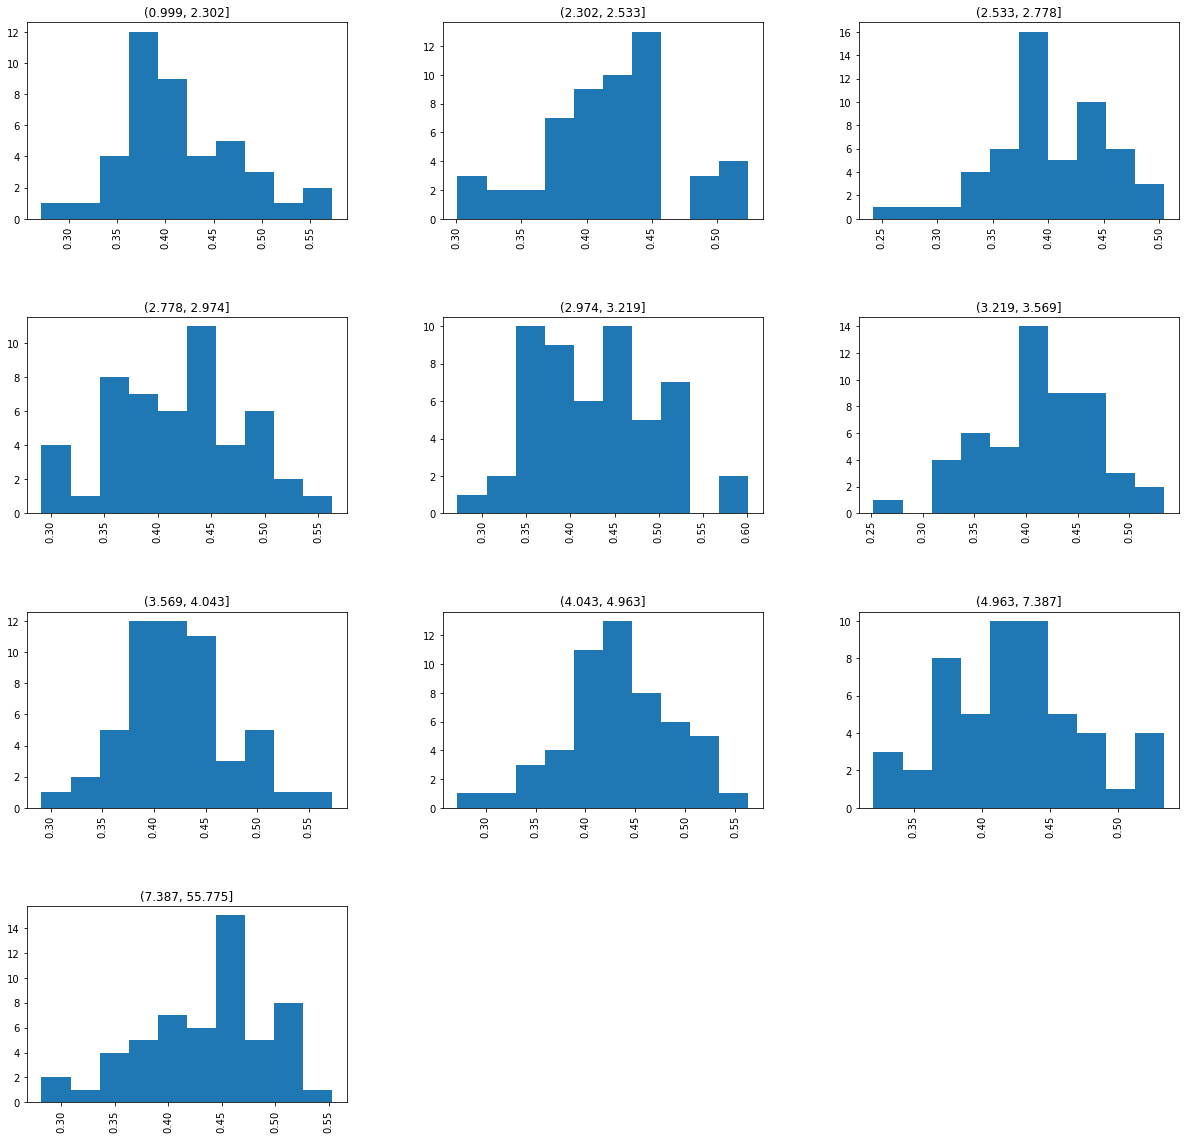

In [188]:
df_analyse.MDA_score.hist(by=df_analyse["News_Quantile"], bins=10, figsize=(20,20))

In [189]:
df_analyse.groupby("News_Quantile").agg(("mean","median","min","max","std"))

MDA_score                                        
                     mean    median       min       max       std
News_Quantile                                                    
(0.999, 2.302]   0.416577  0.407767  0.271845  0.572816  0.061563
(2.302, 2.533]   0.420040  0.417476  0.300971  0.524272  0.050129
(2.533, 2.778]   0.400989  0.398058  0.242718  0.504854  0.051359
(2.778, 2.974]   0.417476  0.417476  0.291262  0.563107  0.060995
(2.974, 3.219]   0.428305  0.427184  0.271845  0.601942  0.068884
(3.219, 3.569]   0.411614  0.407767  0.252427  0.533981  0.057606
(3.569, 4.043]   0.422422  0.407767  0.291262  0.572816  0.052788
(4.043, 4.963]   0.428650  0.427184  0.271845  0.563107  0.057671
(4.963, 7.387]   0.423450  0.427184  0.320388  0.533981  0.049136
(7.387, 55.775]  0.436174  0.446602  0.281553  0.553398  0.060729

In [190]:
# Return RMSE and MDA
#dc_var_rmse = np.sqrt(mean_squared_error(y_hat_c, y_test_c))
print(f"During Corona:")


list_scores=[]
for i in test_set_corona.Companies.unique()[:]:
    x= np.sqrt(mean_squared_error(test_set_corona[test_set_corona.Companies==i]["Excess_returns"],\
                   test_set_corona[test_set_corona.Companies==i]["y_hat"]))
    list_scores.append(x)

#return mean score per company
dc_var_rmse=np.mean(list_scores)

print(f"RMSE: {dc_var_rmse}")

list_scores=[]
for i in test_set_corona.Companies.unique()[:]:
    x=get_mda_orig(test_set_corona[test_set_corona.Companies==i]["Excess_returns"],\
                   test_set_corona[test_set_corona.Companies==i]["y_hat"])
    list_scores.append(x)

#return mean score per company
dc_var_mda=np.mean(list_scores)

#dc_var_mda = get_mda(y_test_c,y_hat_c)
print(f"MDA: {dc_var_mda}")

During Corona:
RMSE: 0.03253239165151491
MDA: 0.4017512410369553


# Summary

### RMSE  results

In [191]:
rmse_table = pd.DataFrame({
    'method': ['Mean baseline', 'Persistence baseline','Dynamic Panel'],
    'Pre Corona': [pc_mean_bl_rmse,pc_per_bl_rmse,pc_var_rmse],
    'During Corona': [dc_mean_bl_rmse,dc_per_bl_rmse,dc_var_rmse],
})

rmse_table.set_index("method", inplace=True)

# add columns with percent changes on the baselines
rmse_table['Pre Corona -  % Change on Mean baseline'] = (rmse_table['Pre Corona'] / pc_mean_bl_rmse -1)
rmse_table['Pre Corona -  % Change on Persistence baseline'] = (rmse_table['Pre Corona'] / pc_per_bl_rmse -1)
rmse_table['During Corona - % Change on Mean baseline'] =  (rmse_table['During Corona'] / dc_mean_bl_rmse -1)
rmse_table['During Corona - % Change on Persistence baseline'] =  (rmse_table['During Corona'] / dc_per_bl_rmse -1)

rmse_table

,Pre Corona,During Corona,Pre Corona - % Change on Mean baseline,Pre Corona - % Change on Persistence baseline,During Corona - % Change on Mean baseline,During Corona - % Change on Persistence baseline
method,,,,,,
Mean baseline,0.013781,0.032517,0.000000,-0.275875,0.000000,-0.288503
Persistence baseline,0.019031,0.045702,0.380977,0.000000,0.405488,0.000000
Dynamic Panel,0.013763,0.032532,-0.001288,-0.276808,0.000469,-0.288170


Very similar performance

### MDA results

In [192]:
mda_table = pd.DataFrame({
    'method': ['Up baseline', 'Persistence baseline','Dynamic Panel'],
    'Pre Corona':    [pc_up_bl_mda,pc_per_bl_mda,pc_var_mda],
    'During Corona': [dc_up_bl_mda,dc_per_bl_mda,dc_var_mda],
})

mda_table.set_index("method", inplace=True)

# add columns with percent changes on the baselines
mda_table['Pre Corona -  % Change on Up baseline'] = (mda_table['Pre Corona'] - pc_up_bl_mda )
mda_table['Pre Corona -  % Change on Persistence baseline'] = (mda_table['Pre Corona'] - pc_per_bl_mda )
mda_table['During Corona - % Change on Up baseline'] =  (mda_table['During Corona'] - dc_up_bl_mda )
mda_table['During Corona - % Change on Persistence baseline'] =  (mda_table['During Corona'] - dc_per_bl_mda )

mda_table

,Pre Corona,During Corona,Pre Corona - % Change on Up baseline,Pre Corona - % Change on Persistence baseline,During Corona - % Change on Up baseline,During Corona - % Change on Persistence baseline
method,,,,,,
Up baseline,0.499280,0.497633,0.000000,0.162455,0.000000,0.180870
Persistence baseline,0.336824,0.316763,-0.162455,0.000000,-0.180870,0.000000
Dynamic Panel,0.420533,0.401751,-0.078747,0.083708,-0.095882,0.084988


Huge increase in MDA performance.

In [193]:
list_results=[rmse_table,mda_table]

In [194]:
from pandas import ExcelWriter
# from pandas.io.parsers import ExcelWriter

def save_xls(list_dfs, xls_path):
    with ExcelWriter(xls_path) as writer:
        for n, df in enumerate(list_dfs):
            df.to_excel(writer,'sheet%s' % n)
        writer.save()

In [195]:
# store to excel
save_xls(list_results,"1_Results/Test_Regression results_"+sent_choice_pos+".xlsx")